In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Описание данных

In [2]:
# загружаем датасет и смотрим на названия признаков и размер датасета
df = pd.read_csv('HW1_var_4.csv', delimiter=';')

print(f'размер таблицы: {df.shape}\nПризнаки:\n\t', end='')
print(*df.columns, sep='\n\t')

размер таблицы: (10243, 44)
Признаки:
	Номер варианта
	ID
	INCOME_BASE_TYPE
	CREDIT_PURPOSE
	INSURANCE_FLAG
	DTI
	SEX
	FULL_AGE_CHILD_NUMBER
	DEPENDANT_NUMBER
	EDUCATION
	EMPL_TYPE
	EMPL_SIZE
	BANKACCOUNT_FLAG
	Period_at_work
	age
	EMPL_PROPERTY
	EMPL_FORM
	FAMILY_STATUS
	max90days
	max60days
	max30days
	max21days
	max14days
	avg_num_delay
	if_zalog
	num_AccountActive180
	num_AccountActive90
	num_AccountActive60
	Active_to_All_prc
	numAccountActiveAll
	numAccountClosed
	sum_of_paym_months
	all_credits
	Active_not_cc
	own_closed
	min_MnthAfterLoan
	max_MnthAfterLoan
	dlq_exist
	thirty_in_a_year
	sixty_in_a_year
	ninety_in_a_year
	thirty_vintage
	sixty_vintage
	ninety_vintage


Разберемся что все эти признаки означают и сохраним для них описание

In [3]:
feature_description = {
    'Номер варианта':        'Номер варианта',
    'ID':                    'Идентификатор клиента',
    'INCOME_BASE_TYPE':      'Подтверждение дохода',
    'CREDIT_PURPOSE':        'Цель получения кредита',
    'INSURANCE_FLAG':        'Страхование заемщика при получении кредита 1/0 = да/нет',
    'DTI':                   'debt-to-income ratio -- отношение долга к доходам',
    'SEX':                   'Пол',
    'FULL_AGE_CHILD_NUMBER': 'Количество совершеннолетних детей',
    'DEPENDANT_NUMBER':      'Количество иждивенцев',
    'EDUCATION':             'Уровень образования',
    'EMPL_TYPE':             'Должность',
    'EMPL_SIZE':             'Зарплата',
    'BANKACCOUNT_FLAG':      'Кол-во аккаунтов у клиента',
    'Period_at_work':        'Период работы (кол-во дней)',
    'age':                   'Возраст',
    'EMPL_PROPERTY':         'Сфера деятельности компании',
    'EMPL_FORM':             'Организационно-правовая форма',
    'FAMILY_STATUS':         'Семейный статус',
    'max90days':             'Кол-во запросов в бюро кредитный историй за последние 90 дней',
    'max60days':             'Кол-во запросов в бюро кредитный историй за последние 60 дней',
    'max30days':             'Кол-во запросов в бюро кредитный историй за последние 30 дней',
    'max21days':             'Кол-во запросов в бюро кредитный историй за последние 21 день',
    'max14days':             'Кол-во запросов в бюро кредитный историй за последние 14 дней',
    'avg_num_delay':         'Доля просроченных платежей',
    'if_zalog':              'Наличие залога',
    'num_AccountActive180':  'Количество активных счетов за последние 180 дней',
    'num_AccountActive90':   'Количество активных счетов за последние 90 дней',
    'num_AccountActive60':   'Количество активных счетов за последние 60 дней',
    'Active_to_All_prc':     'Отношение активных счетов ко всем счетам',
    'numAccountActiveAll':   'Кол-во открытых счетов',
    'numAccountClosed':      'Кол-во закрытых счетов',
    'sum_of_paym_months':    'Сумма платежей за последний месяц (тыс.)',
    'all_credits':           'Кол-во кредитов',
    'Active_not_cc':         'Активные кредитные счета, без кредитной карты',
    'own_closed':            'Кол-во закрытых кредитов',
    'min_MnthAfterLoan':     'Кол-во месяцев со взятия последнего кредита',
    'max_MnthAfterLoan':     'Кол-во месяцев со взятия первого кредита',
    'dlq_exist':             'Наличие просрочки на данный момент',
    'thirty_in_a_year':      'Просрочка более 30 дней за последний год',
    'sixty_in_a_year':       'Просрочка более 60 дней за последний год',
    'ninety_in_a_year':      'Просрочка более 90 дней за последний год',
    'thirty_vintage':        'Просрочка более 30 дней когда-либо',
    'sixty_vintage':         'Просрочка более 60 дней когда-либо',
    'ninety_vintage':        'Просрочка более 90 дней когда-либо',
}
pd.Series(feature_description)

Номер варианта                                              Номер варианта
ID                                                   Идентификатор клиента
INCOME_BASE_TYPE                                      Подтверждение дохода
CREDIT_PURPOSE                                      Цель получения кредита
INSURANCE_FLAG           Страхование заемщика при получении кредита 1/0...
DTI                      debt-to-income ratio -- отношение долга к доходам
SEX                                                                    Пол
FULL_AGE_CHILD_NUMBER                    Количество совершеннолетних детей
DEPENDANT_NUMBER                                     Количество иждивенцев
EDUCATION                                              Уровень образования
EMPL_TYPE                                                        Должность
EMPL_SIZE                                                         Зарплата
BANKACCOUNT_FLAG                                Кол-во аккаунтов у клиента
Period_at_work           

Сразу можно выкинуть колонки `Номер варианта` и `ID`, ведь они не несут никакой полезной информации о клиенте.

In [4]:
df.drop(columns=['Номер варианта', 'ID'], inplace=True)

In [5]:
df['DTI'].replace('#ПОЛЕ!', np.nan, inplace=True)
df['DTI'] = df['DTI'].astype(np.float64)

In [6]:
df.replace('*n.a.*', np.nan, inplace=True)

Разделим наши признаки на числовие и категориальные. Бинарные признаки отнесем к категориальным

In [7]:
bin_features = [
    'INSURANCE_FLAG',
    'thirty_in_a_year',
    'thirty_in_a_year',
    'sixty_in_a_year',
    'ninety_in_a_year',
    'thirty_vintage',
    'sixty_vintage',
    'ninety_vintage',
    'if_zalog',
]

numeric_features = df.select_dtypes(include=np.number).drop(columns=bin_features).columns.to_list()
categorical_features = df.drop(columns=numeric_features).columns.to_list()


Построим корреляционную матрицу для числовых признаков.

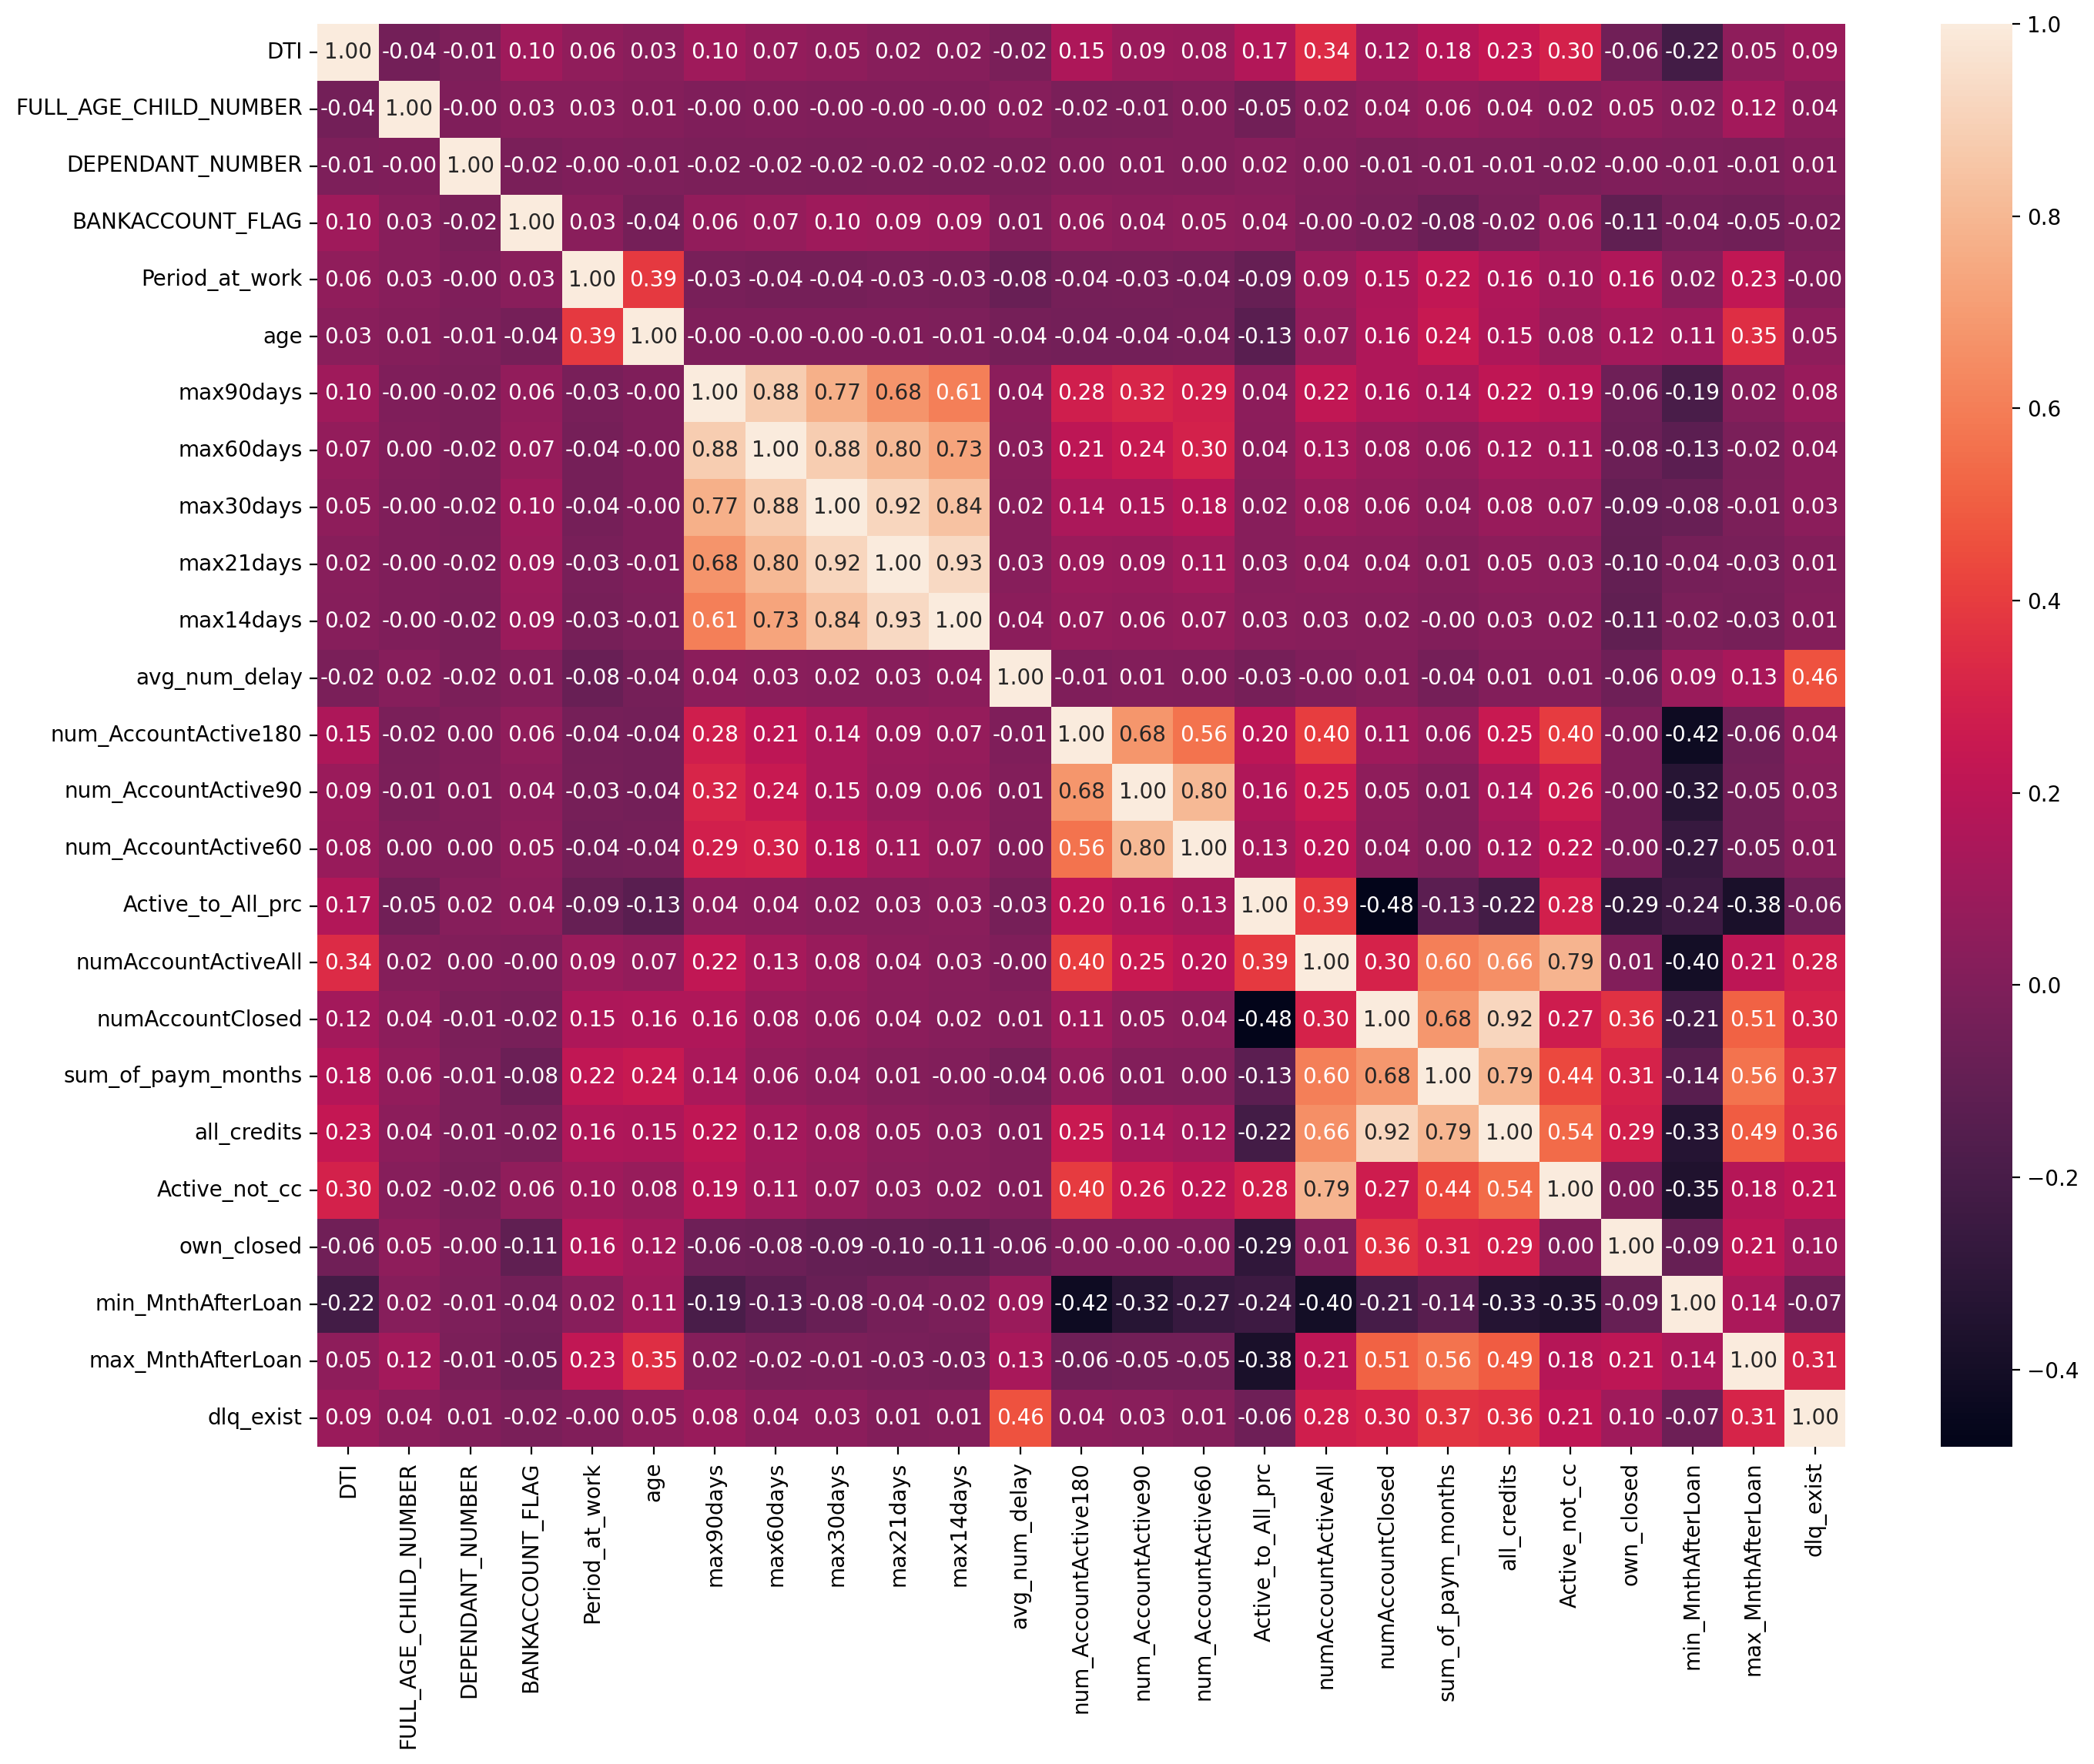

In [8]:
plt.figure(figsize=(16, 12), dpi=200)
sns.heatmap(df[numeric_features].corr(), annot=True, fmt=".2f")
plt.show()

Скроем ячейки имеющие корреляцию менее 0.4 по модулю.

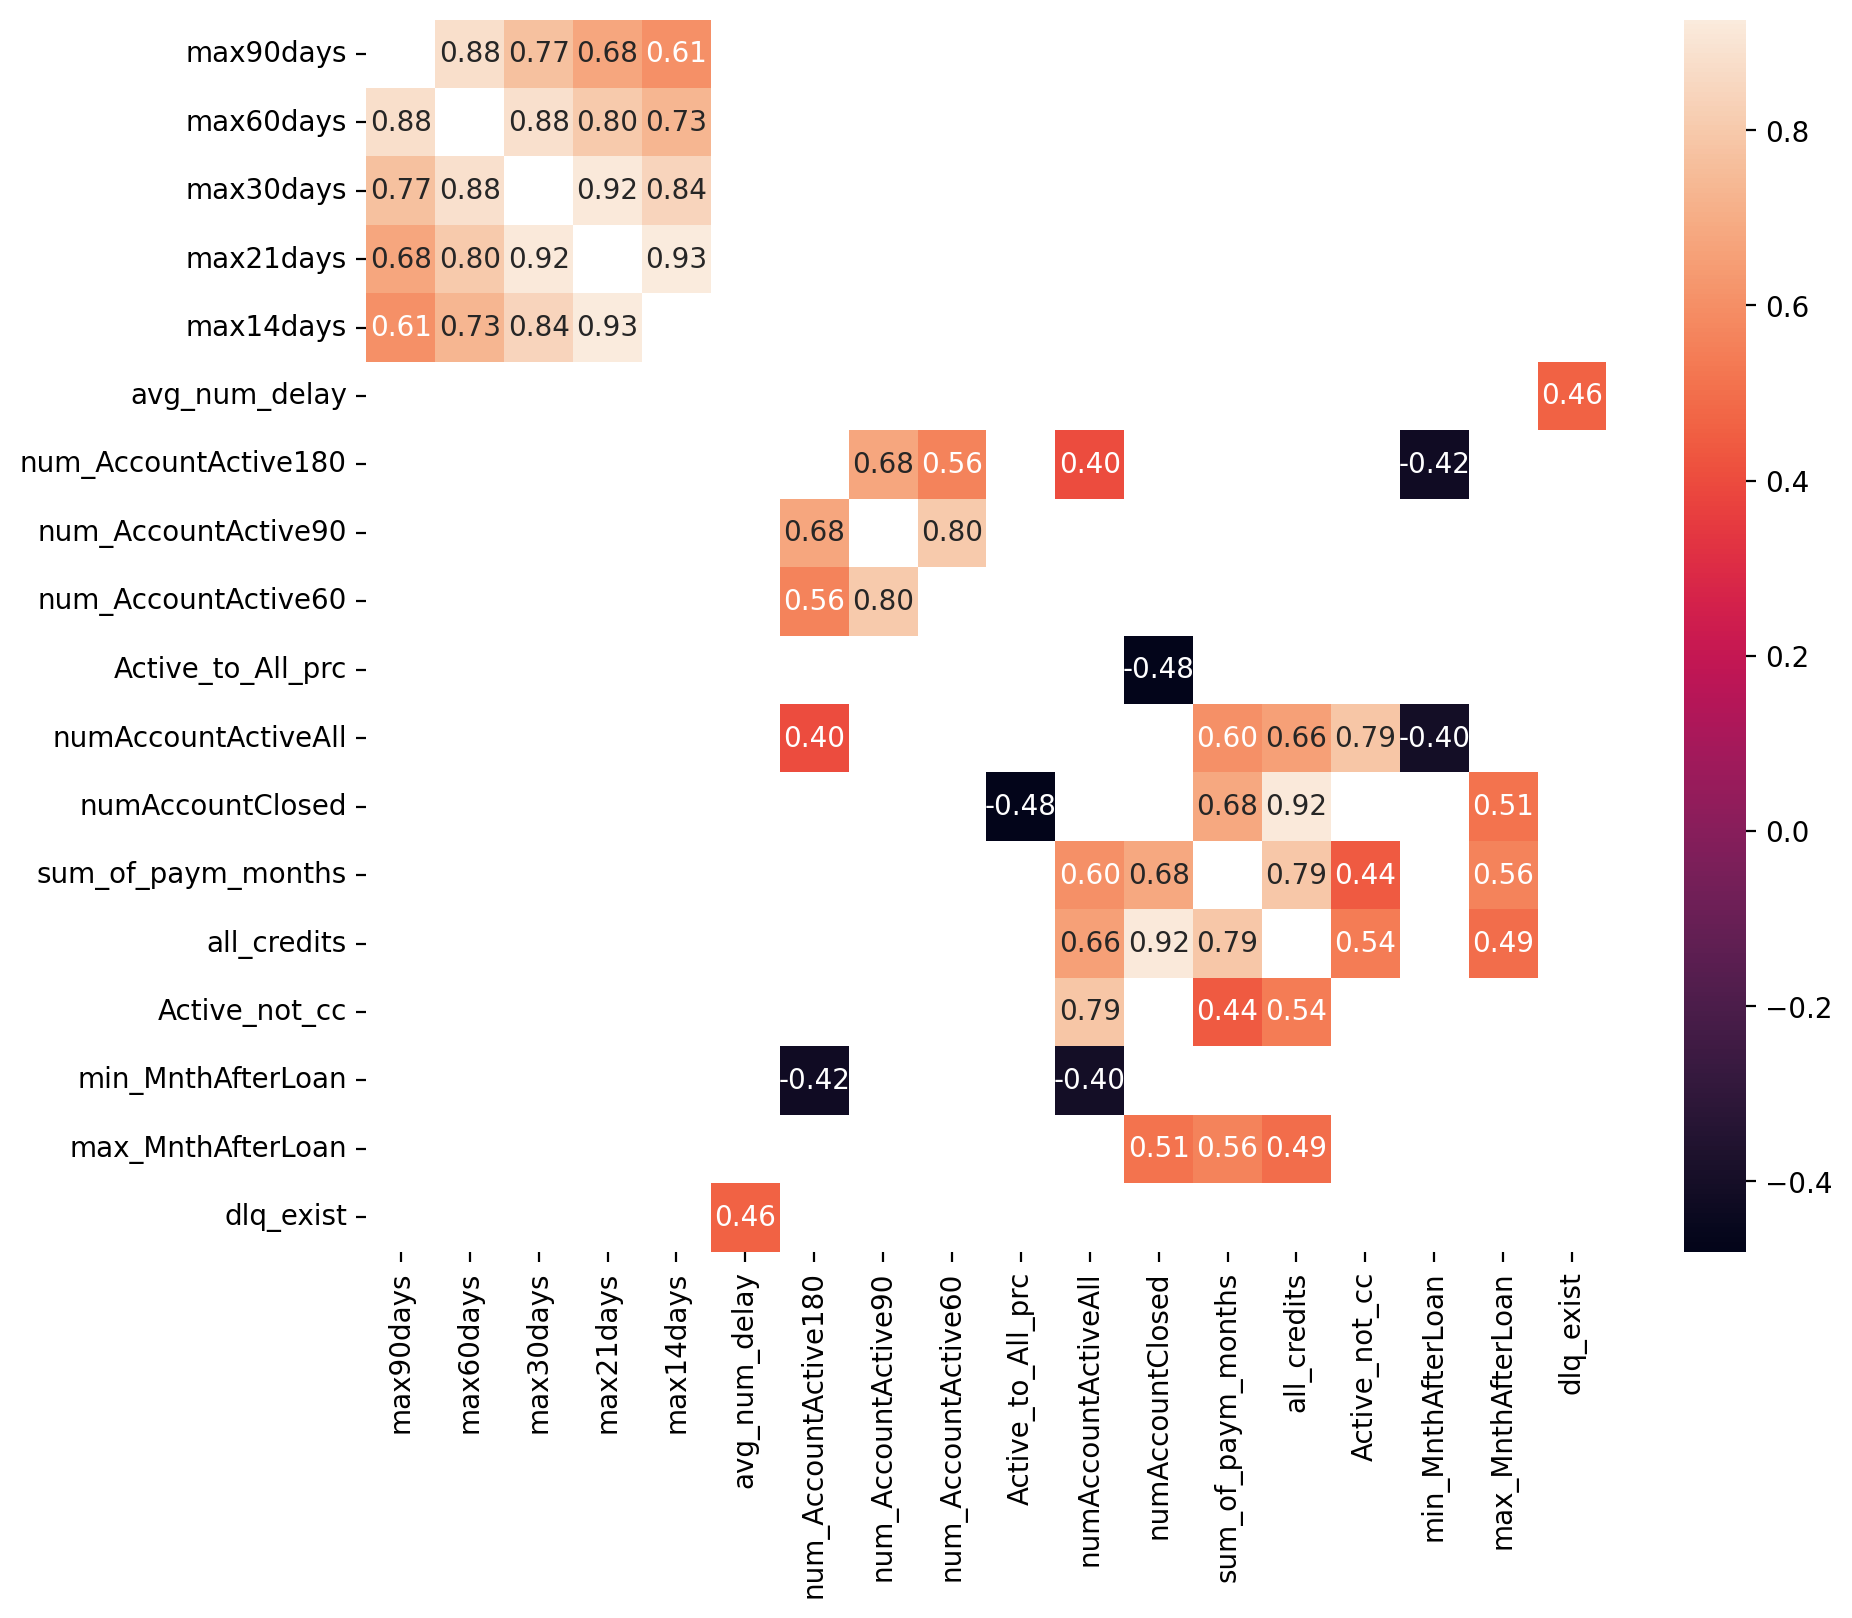

In [9]:
corr = df[numeric_features].corr()
filtered = corr[(corr.abs() > 0.4) & (corr != 1.0)].dropna(how='all').T.dropna(how='all')
plt.figure(figsize=(10, 8), dpi=200)
sns.heatmap(filtered.T, annot=True, fmt=".2f")
plt.show()

Помимо очевидно зависимых групп переменных (`max<number>days` и `num_AccountActive<number>`) высокую попарную скоррелированность имеют пары:

- `all_credits - numAccountClosed`, корреляция равна +0.92
- `all_credits - sum_of_paym_months`, корреляция равна +0.79
- `numAccountActiveAll - Active_not_cc`, корреляция равна 0.79
- `sum_of_paym_months - numAccountClosed`, корреляция равна 0.68
- `numAccountActiveAll - all_credits`, корреляция равна 0.66

Теперь разберемся с пропусками в данных

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10243 entries, 0 to 10242
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INCOME_BASE_TYPE       10177 non-null  object 
 1   CREDIT_PURPOSE         10243 non-null  object 
 2   INSURANCE_FLAG         10241 non-null  float64
 3   DTI                    10113 non-null  float64
 4   SEX                    10243 non-null  object 
 5   FULL_AGE_CHILD_NUMBER  10243 non-null  int64  
 6   DEPENDANT_NUMBER       10243 non-null  int64  
 7   EDUCATION              10205 non-null  object 
 8   EMPL_TYPE              10235 non-null  object 
 9   EMPL_SIZE              10116 non-null  object 
 10  BANKACCOUNT_FLAG       7933 non-null   float64
 11  Period_at_work         7930 non-null   float64
 12  age                    7933 non-null   float64
 13  EMPL_PROPERTY          7933 non-null   object 
 14  EMPL_FORM              3970 non-null   object 
 15  FA

Как видно, большая часть признаков заполнена менее чем у половины пользователей. Давайте для каждого пользователя посчитаем число заполненных для него признаков, чтобы определить каких пользователей и какие признаки выбрать для значимой сегментации.

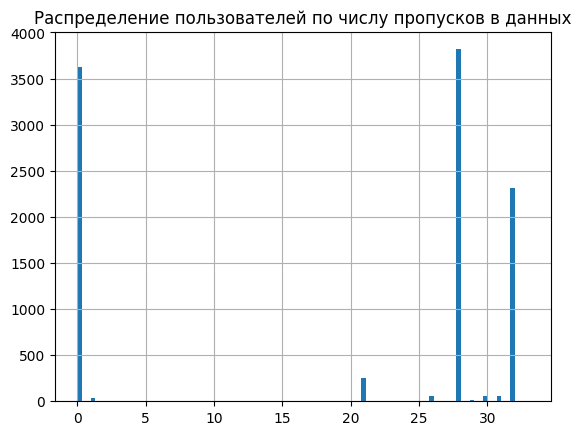

In [11]:
df.isna().sum(axis=1).hist(bins=100)
plt.title('Распределение пользователей по числу пропусков в данных')
plt.show()

Как мы можем видеть, примерно треть пользователей не имеют пропусков, об остальных отсутствует большая часть данных. Таким образом, в выборке присутствует статистически значимое количество клиентов (чуть больше трети), для которых мы имеем всю информацию без пропусков. На них и построим нашу сегментацию. 

In [12]:
filtered = df.dropna()
print(f'размер исходной выборки: {df.shape[0]}')
print(f'размер новой выборки:    {filtered.shape[0]}, что является {round(100*filtered.shape[0]/df.shape[0], 1)}% от исходной')
# df = filtered

размер исходной выборки: 10243
размер новой выборки:    3621, что является 35.4% от исходной


Построим распределение признаков в исходной и новой выбрках, чтобы убедиться, что они не сильно отличаются. Рассмотрим, только первые 14 признаков, потому что остальные и так редко встречаются в данных.

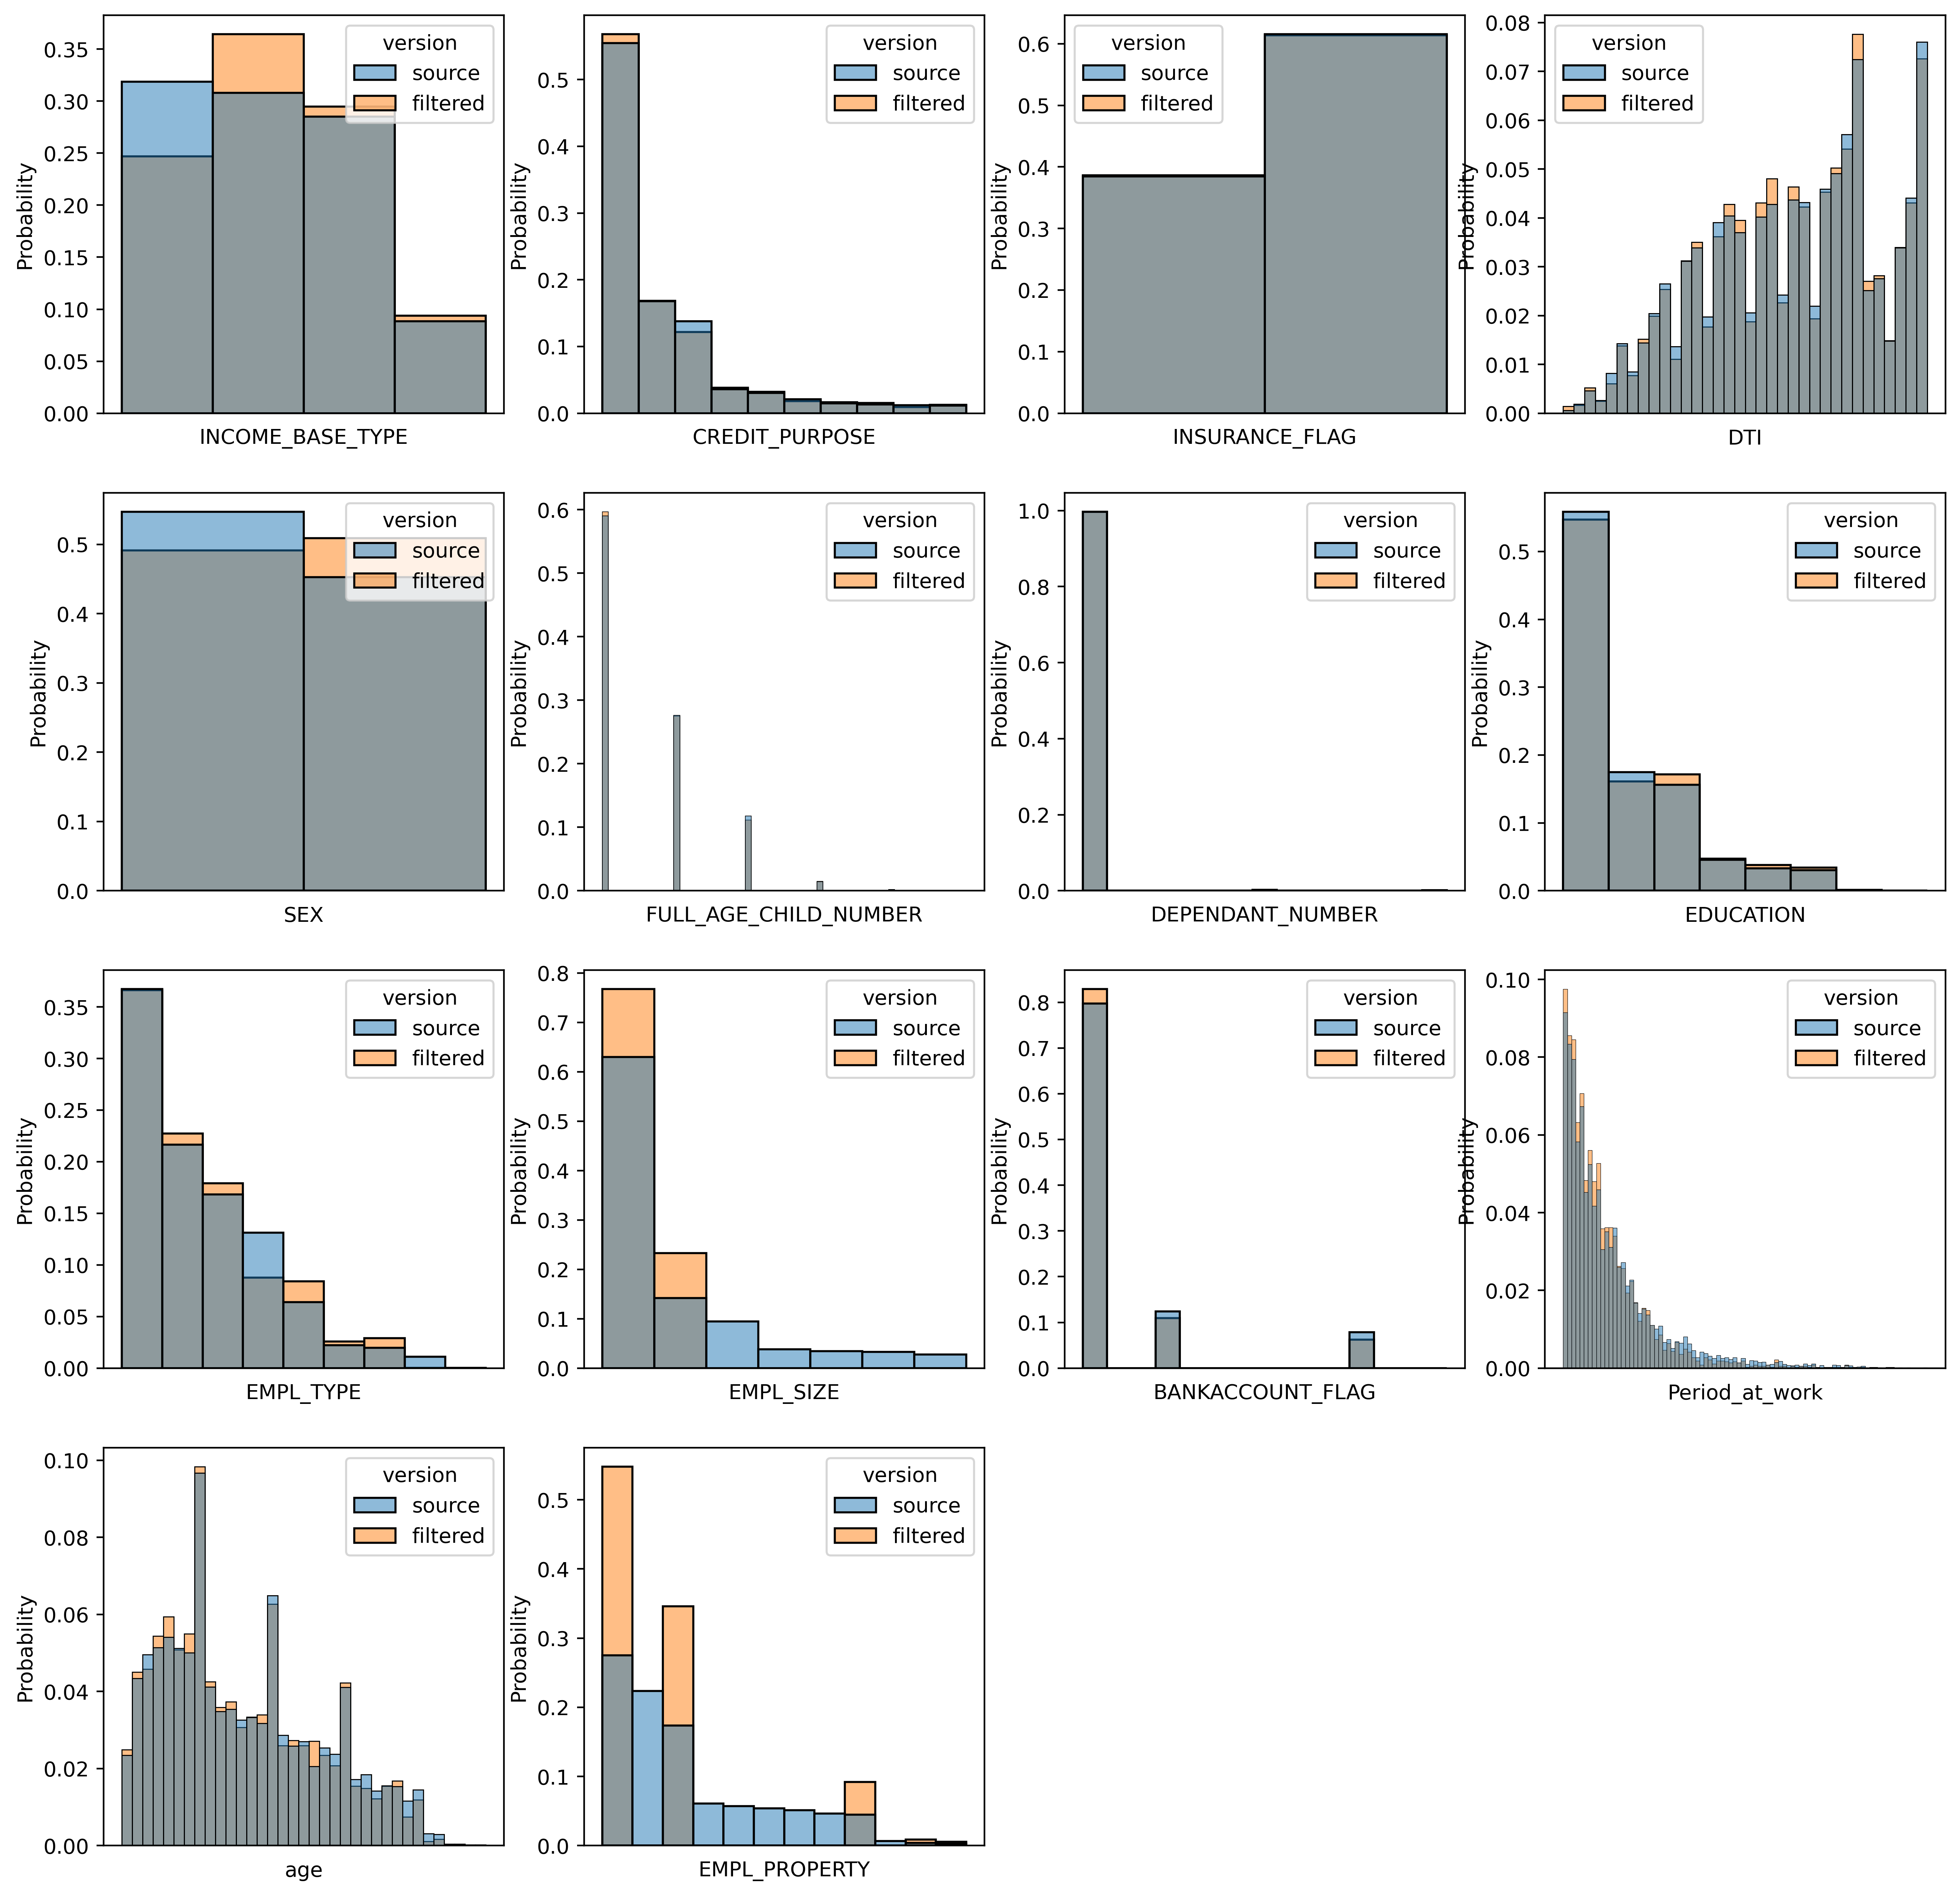

In [13]:
features = df.columns[:14]
n_columns = round(np.sqrt(features.shape[0]))
n_rows = (features.shape[0]+n_columns-1) // n_columns

plt.figure(figsize=(16, 16), dpi=400)

for num, column in enumerate(features):
    plt.subplot(n_rows, n_columns, num+1)
    
    cur_source = df[column].dropna()
    cur_filtered = filtered[column].dropna()
    
    tmp=pd.DataFrame(columns=[column])
    tmp[column]=np.concatenate([cur_source, cur_filtered])
    tmp['version'] = ['source' if i < cur_source.shape[0] else 'filtered' for i in tmp.index]
    
    if column in categorical_features:
        tmp[column] = pd.Categorical(tmp[column], tmp[column][tmp['version'] == 'source'].value_counts(dropna=False).index.to_list())

    sns.histplot(data=tmp, x=column, hue='version', stat='probability', common_norm=False)
    plt.xticks([])
        
        
plt.show()

Как видно, распределение признаков после сужения выборки почти не изменилось. Только признаки `EMPL_PROPERTY` и `EMPL_SIZE` заметно изменились, потеряв часть уникальных значений.

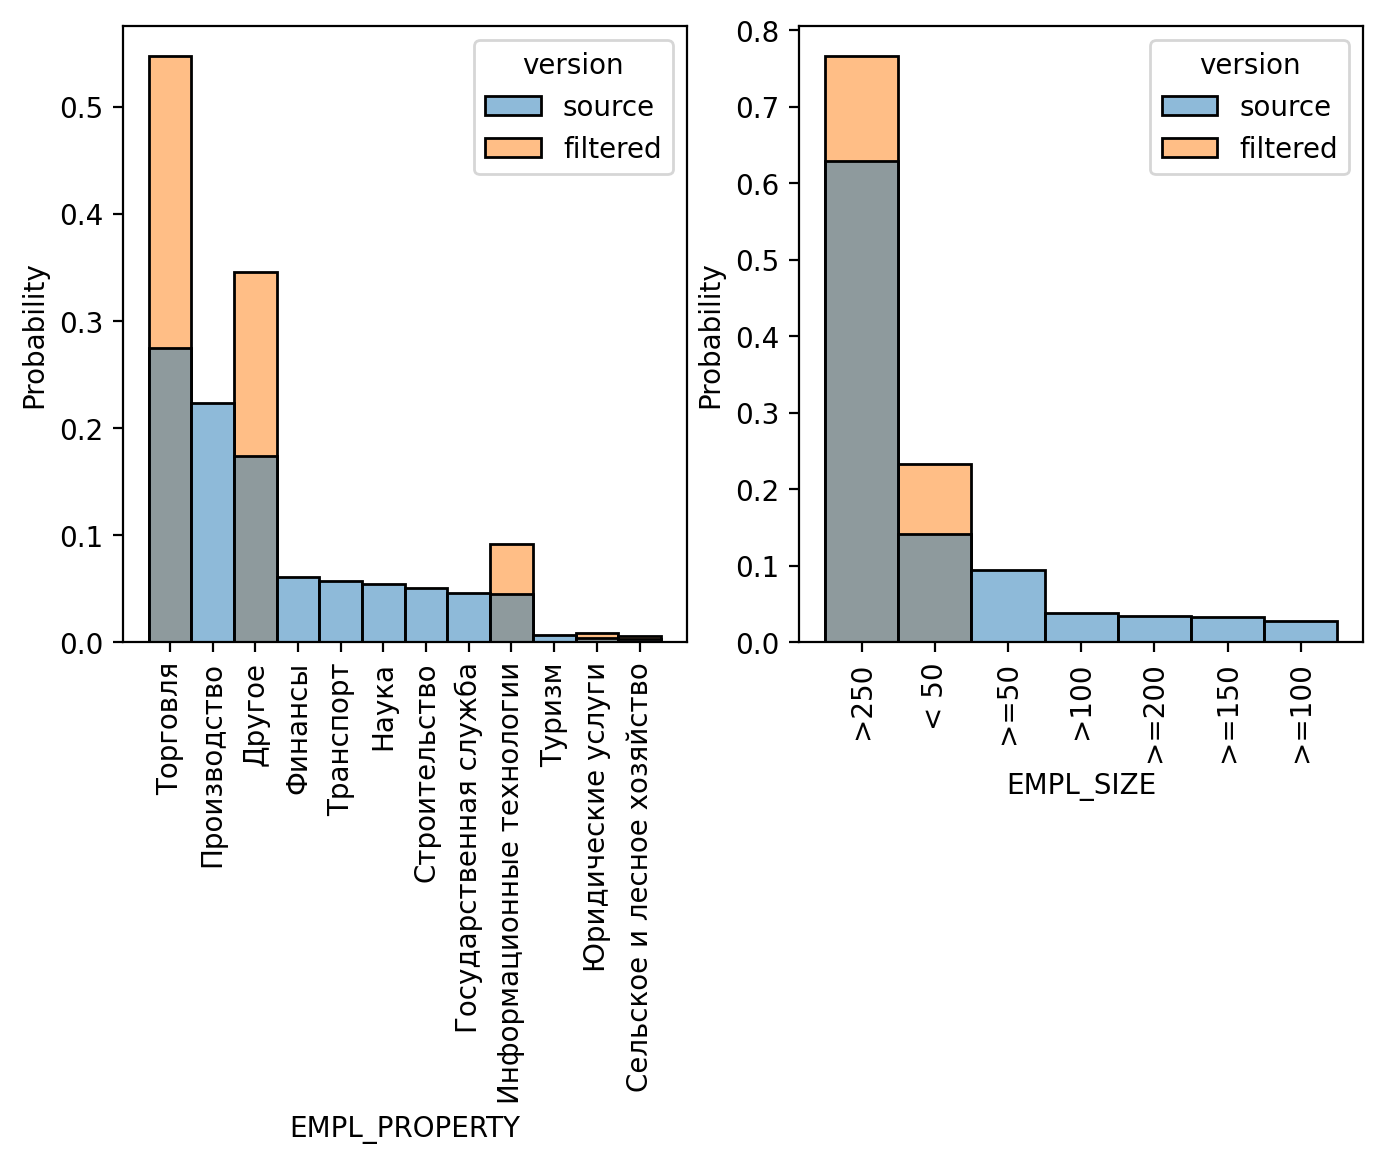

In [14]:
plt.figure(figsize=(8, 4), dpi=200)

plt.subplot(1, 2, 1)

column = 'EMPL_PROPERTY'
cur_source = df[column].dropna()
cur_filtered = filtered[column].dropna()
tmp=pd.DataFrame(columns=[column])
tmp[column]=np.concatenate([cur_source, cur_filtered])
tmp['version'] = ['source' if i < cur_source.shape[0] else 'filtered' for i in tmp.index]
tmp[column] = pd.Categorical(tmp[column], tmp[column][tmp['version'] == 'source'].value_counts(dropna=False).index.to_list())
sns.histplot(data=tmp, x=column, hue='version', stat='probability', common_norm=False)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
column = 'EMPL_SIZE'
cur_source = df[column].dropna()
cur_filtered = filtered[column].dropna()
tmp=pd.DataFrame(columns=[column])
tmp[column]=np.concatenate([cur_source, cur_filtered])
tmp['version'] = ['source' if i < cur_source.shape[0] else 'filtered' for i in tmp.index]
tmp[column] = pd.Categorical(tmp[column], tmp[column][tmp['version'] == 'source'].value_counts(dropna=False).index.to_list())
sns.histplot(data=tmp, x=column, hue='version', stat='probability', common_norm=False)
plt.xticks(rotation=90)

plt.show()

При более детальном рассмотрении этих двух признаков становится понятно, что исключив из выборки клиентов, о которых заполнено лишь небольшая часть данных мы рискуем потерять значимую прослойку населения. Если оставить только людей со всей доступной информацией, то у нас останутся люди с доходом более 250 или менее 50 тыс. руб., при том занятые, как правило, в торговле или ИТ. Очевидно, что эти данные не охватят всю клиентскую базу.

Более того, из представленных выше графиков видно, что сузив выборку мы потеряем значительную часть клиентов, занятых в производстве или других рабочих профессиях, имеющих зарплату от 50 до 250 тыс. рублей, а это, на мой взгляд, довольно важная и значимая для бизнеса прослойка современного российского общества.

Теперь выкинем последние столбики датасета, содержащие информацию о меньшей части клиентов и повторим анализ.

In [15]:
df = df.iloc[:, :14]

In [16]:
filtered = df.dropna()
print(f'размер исходной выборки: {df.shape[0]}')
print(f'размер новой выборки:    {filtered.shape[0]}, что является {round(100*filtered.shape[0]/df.shape[0], 1)}% от исходной')


размер исходной выборки: 10243
размер новой выборки:    7769, что является 75.8% от исходной


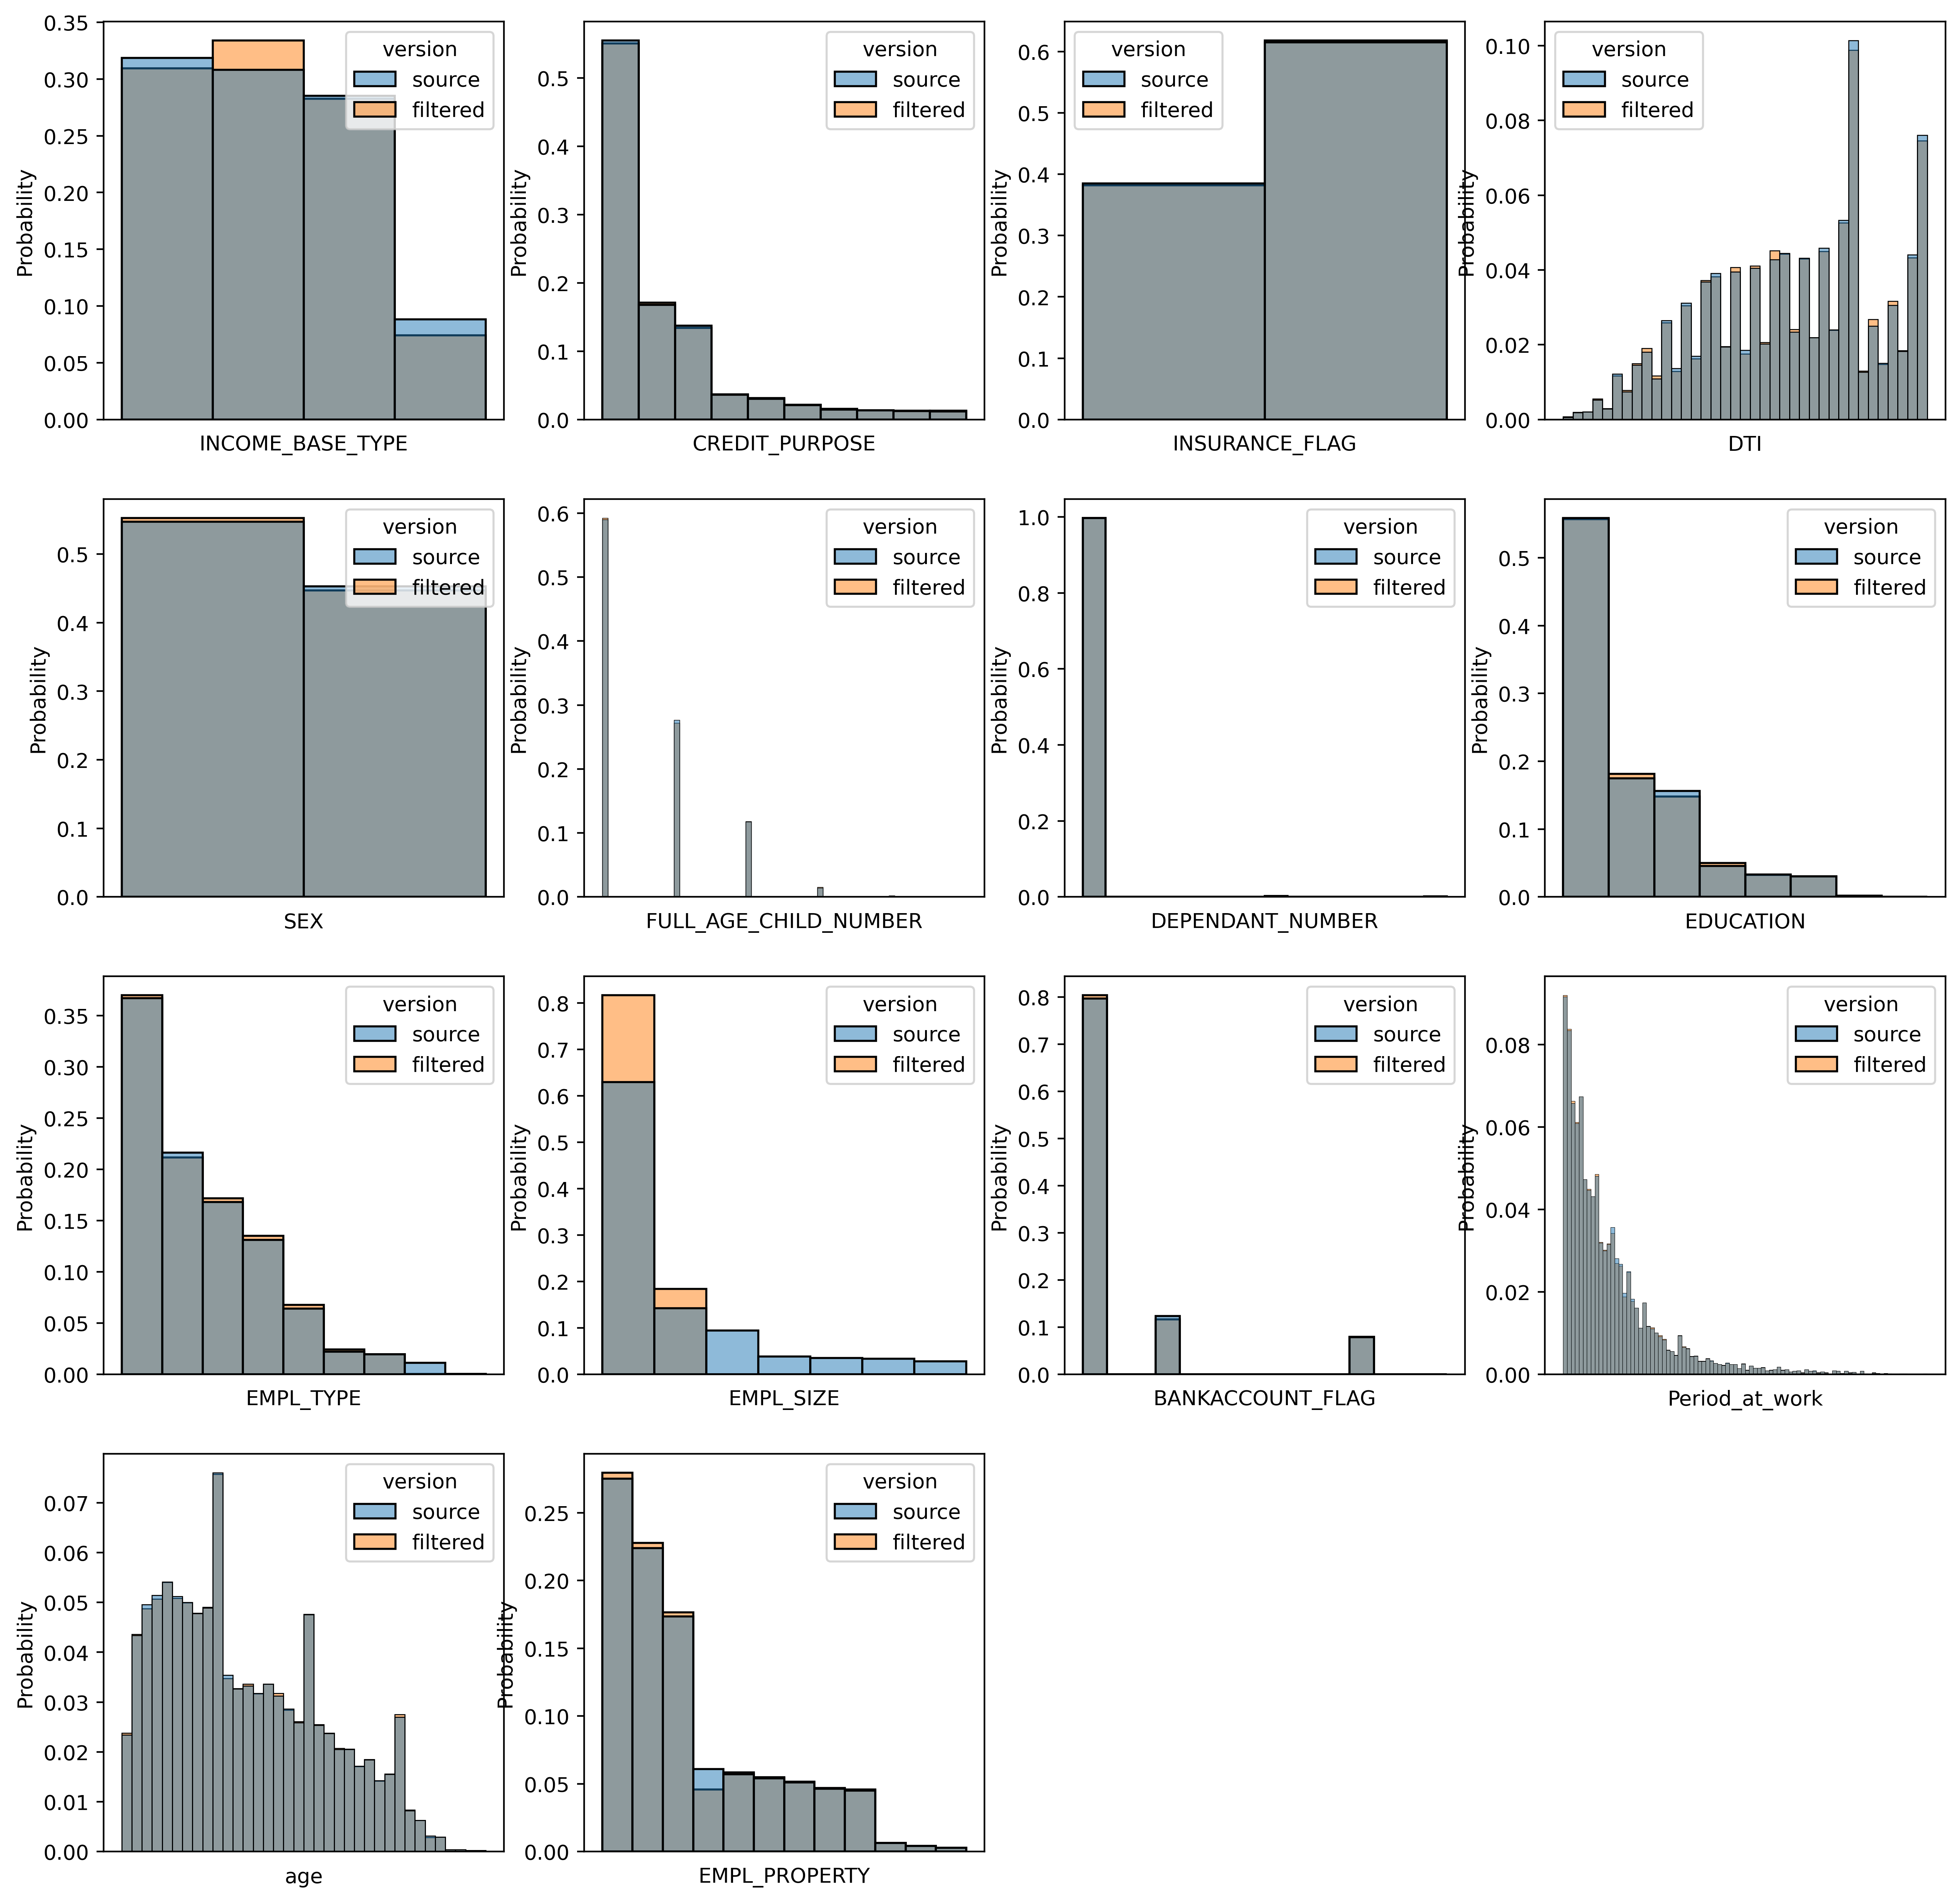

In [17]:
features = df.columns[:14]
n_columns = round(np.sqrt(features.shape[0]))
n_rows = (features.shape[0]+n_columns-1) // n_columns

plt.figure(figsize=(16, 16), dpi=400)

for num, column in enumerate(features):
    plt.subplot(n_rows, n_columns, num+1)
    
    cur_source = df[column].dropna()
    cur_filtered = filtered[column].dropna()
    
    tmp=pd.DataFrame(columns=[column])
    tmp[column]=np.concatenate([cur_source, cur_filtered])
    tmp['version'] = ['source' if i < cur_source.shape[0] else 'filtered' for i in tmp.index]
    
    if column in categorical_features:
        tmp[column] = pd.Categorical(tmp[column], tmp[column][tmp['version'] == 'source'].value_counts(dropna=False).index.to_list())

    sns.histplot(data=tmp, x=column, hue='version', stat='probability', common_norm=False)
    plt.xticks([])
        
        
plt.show()

Как видим, теперь мы не искажаем распределения признаков, однако по прежнему выкидываем всех клиентов с зарплатой от 50 до 250 тыс. руб., а это четверть клиентов. При этом теряем мы их из-за того, что значения переменных `BANKACCOUNT_FLAG`, `Period_at_work`, `age`, `EMPL_PROPERTY` не заполнены для этих людей. Ну что же, давайте заполним эти пропуски и запомним какие ячейки заполнены нами самомтоятельно, чтобы стараться не слишком сильно опираться на них в будущем.

Для того чтобы заполнять колонки будем использовать CatBoostClassifier и CatBoostRegressor. Для обучения закодируем почти все категориальные признаки, кроме признаков `SEX`, `EDUCATION` и `EMPL_SIZE`. На значениях этих признаков можно построить порядок, поэтому кодировать мы их будем следующим образом:

In [18]:
replace_dct = {
    'SEX': {
        'женский': 1,
        'мужской': 0
    },
    'EDUCATION': {
        'Неполное среднее': 1,
        'среднее-специальное': 2,
        'среднее': 2,
        'незаконченное высшее': 3,
        'высшее': 4,
        'второе высшее': 5,
        'ученая степень': 6,
        'Высшее/Второе высшее/Ученая степень': 4,
    },
    'EMPL_SIZE': {
        '< 50': 1,
        '>=50': 2,
        '>100': 3,
        '>=100': 4,
        '>=150': 5,
        '>=200': 6,
        '>250': 7
    },
}

При заполнении пропусков будем сравнивать наш метод с базовой моделью, выдающей константу. Для задачи регрессии (числовые признаки) в качестве константы базовой модели будем использовать среднее, для задачи классификации --- моду. В качестве метрики качества в случае регрессии будем использовать RMSE, в случае классификации accuracy.

Будем обучать модель предсказывающую наши пропуски дважды. Первый раз не на всех данных. На неиспользованных данных провалидируем наш результат и сравним метрку качества с базовой моделью. Удостоверившись, что наша модель не уступает базовой, обучимся на всей выборке и заполним пропуски.

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import functools

def ohe(column):
    return OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit_transform(
            column.to_numpy().reshape(-1, 1))

def encode(df):
    res = np.empty((df.shape[0], 0))
    ohe_columns = [
        'INCOME_BASE_TYPE',
        'CREDIT_PURPOSE',
        'EMPL_TYPE',
        'EMPL_PROPERTY',
    ]
    
    for column_name in df.columns:
        if column_name in ohe_columns:
            cur = ohe(df[column_name])
        elif column_name in replace_dct:
            cur = df[column_name].replace(
                replace_dct[column_name]).astype(np.float64).to_numpy().reshape(-1, 1)
        else:
            cur = df[column_name].astype(np.float64).to_numpy().reshape(-1, 1)
        res = np.concatenate((res, cur), axis=1)
            
    return res

def fill(data_, fill_column_, how='classify'):
    
    if how == 'regression':
        metric = functools.partial(mean_squared_error, squared=False)
        metric_name = 'RMSE'
        Model = CatBoostRegressor
        baseline_method = 'mean'
    elif how == 'classify':
        metric = accuracy_score
        metric_name = 'accuracy'
        Model = CatBoostClassifier
        baseline_method = 'mode'
    else:
        raise BaseException(f'Unknown filling method: {how}')
        
    
    data = data_.copy()
    fill_column = fill_column_.copy()

    data = pd.DataFrame(encode(data), index=data.index)


    eval_mask = fill_column.isna()
    eval_index = eval_mask[eval_mask].index
    train_valid_mask = ~fill_column.isna()
    train_index, valid_index = train_test_split(train_valid_mask[train_valid_mask].index, test_size=0.3)

    
    value = metric(np.full(
        valid_index.shape, 
        getattr(fill_column.loc[train_index], baseline_method)()),
            fill_column.loc[valid_index])
    print(f'baseline   {metric_name}: {value}')
    

    model = Model(silent=True)
    model.fit(data.loc[train_index, :], fill_column.loc[train_index])
    print(f'validation {metric_name}: {metric(model.predict(data.loc[valid_index, :]), fill_column.loc[valid_index])}')
    model = Model(silent=True)
    model.fit(data[train_valid_mask], fill_column[train_valid_mask])
    print(f'train      {metric_name}: {metric(model.predict(data[train_valid_mask]), fill_column[train_valid_mask])}')
    pred = model.predict(data[eval_mask])

    fill_column[eval_mask] = pred.reshape(-1)
    
    return fill_column

In [26]:
data = df.iloc[:, :10].dropna()
df2 = df.copy()

In [27]:
column_name = 'age'
df2[column_name] = fill(data, df[column_name][data.index], how='regression')

baseline   RMSE: 8.661298403947242
validation RMSE: 8.081640588295677
train      RMSE: 7.0722144537965885


In [28]:
column_name = 'Period_at_work'
df2[column_name] = fill(data, df[column_name][data.index], how='regression')

baseline   RMSE: 63.69469247318128
validation RMSE: 62.81585187185415
train      RMSE: 55.16749036682673


In [29]:
column_name = 'EMPL_PROPERTY'
df2[column_name] = fill(data, df[column_name][data.index], how='classify')

baseline   accuracy: 0.26801029159519724
validation accuracy: 0.31732418524871353
train      accuracy: 0.6156716417910447


In [30]:
column_name = 'BANKACCOUNT_FLAG'
df2[column_name] = fill(data, df[column_name][data.index], how='classify')

baseline   accuracy: 0.8036020583190394
validation accuracy: 0.7860205831903945
train      accuracy: 0.870174987133299


Как видим, нам не удалось сильно обогнать базовую модель, однако такой подход позволил нам сохранить закономерности в данных, не испортив совместное распределение заполняемых величин (это проверяется ниже). В будущем это поможет для интерпретации.

Заполнили большую часть пропусков, давайте снова сравним полученную выборку с исходной.

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10243 entries, 0 to 10242
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INCOME_BASE_TYPE       10177 non-null  object 
 1   CREDIT_PURPOSE         10243 non-null  object 
 2   INSURANCE_FLAG         10241 non-null  float64
 3   DTI                    10113 non-null  float64
 4   SEX                    10243 non-null  object 
 5   FULL_AGE_CHILD_NUMBER  10243 non-null  int64  
 6   DEPENDANT_NUMBER       10243 non-null  int64  
 7   EDUCATION              10205 non-null  object 
 8   EMPL_TYPE              10235 non-null  object 
 9   EMPL_SIZE              10116 non-null  object 
 10  BANKACCOUNT_FLAG       10074 non-null  float64
 11  Period_at_work         10074 non-null  float64
 12  age                    10074 non-null  float64
 13  EMPL_PROPERTY          10074 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ 

размер исходной выборки: 10243
размер новой выборки:    10074, что является 98.4% от исходной


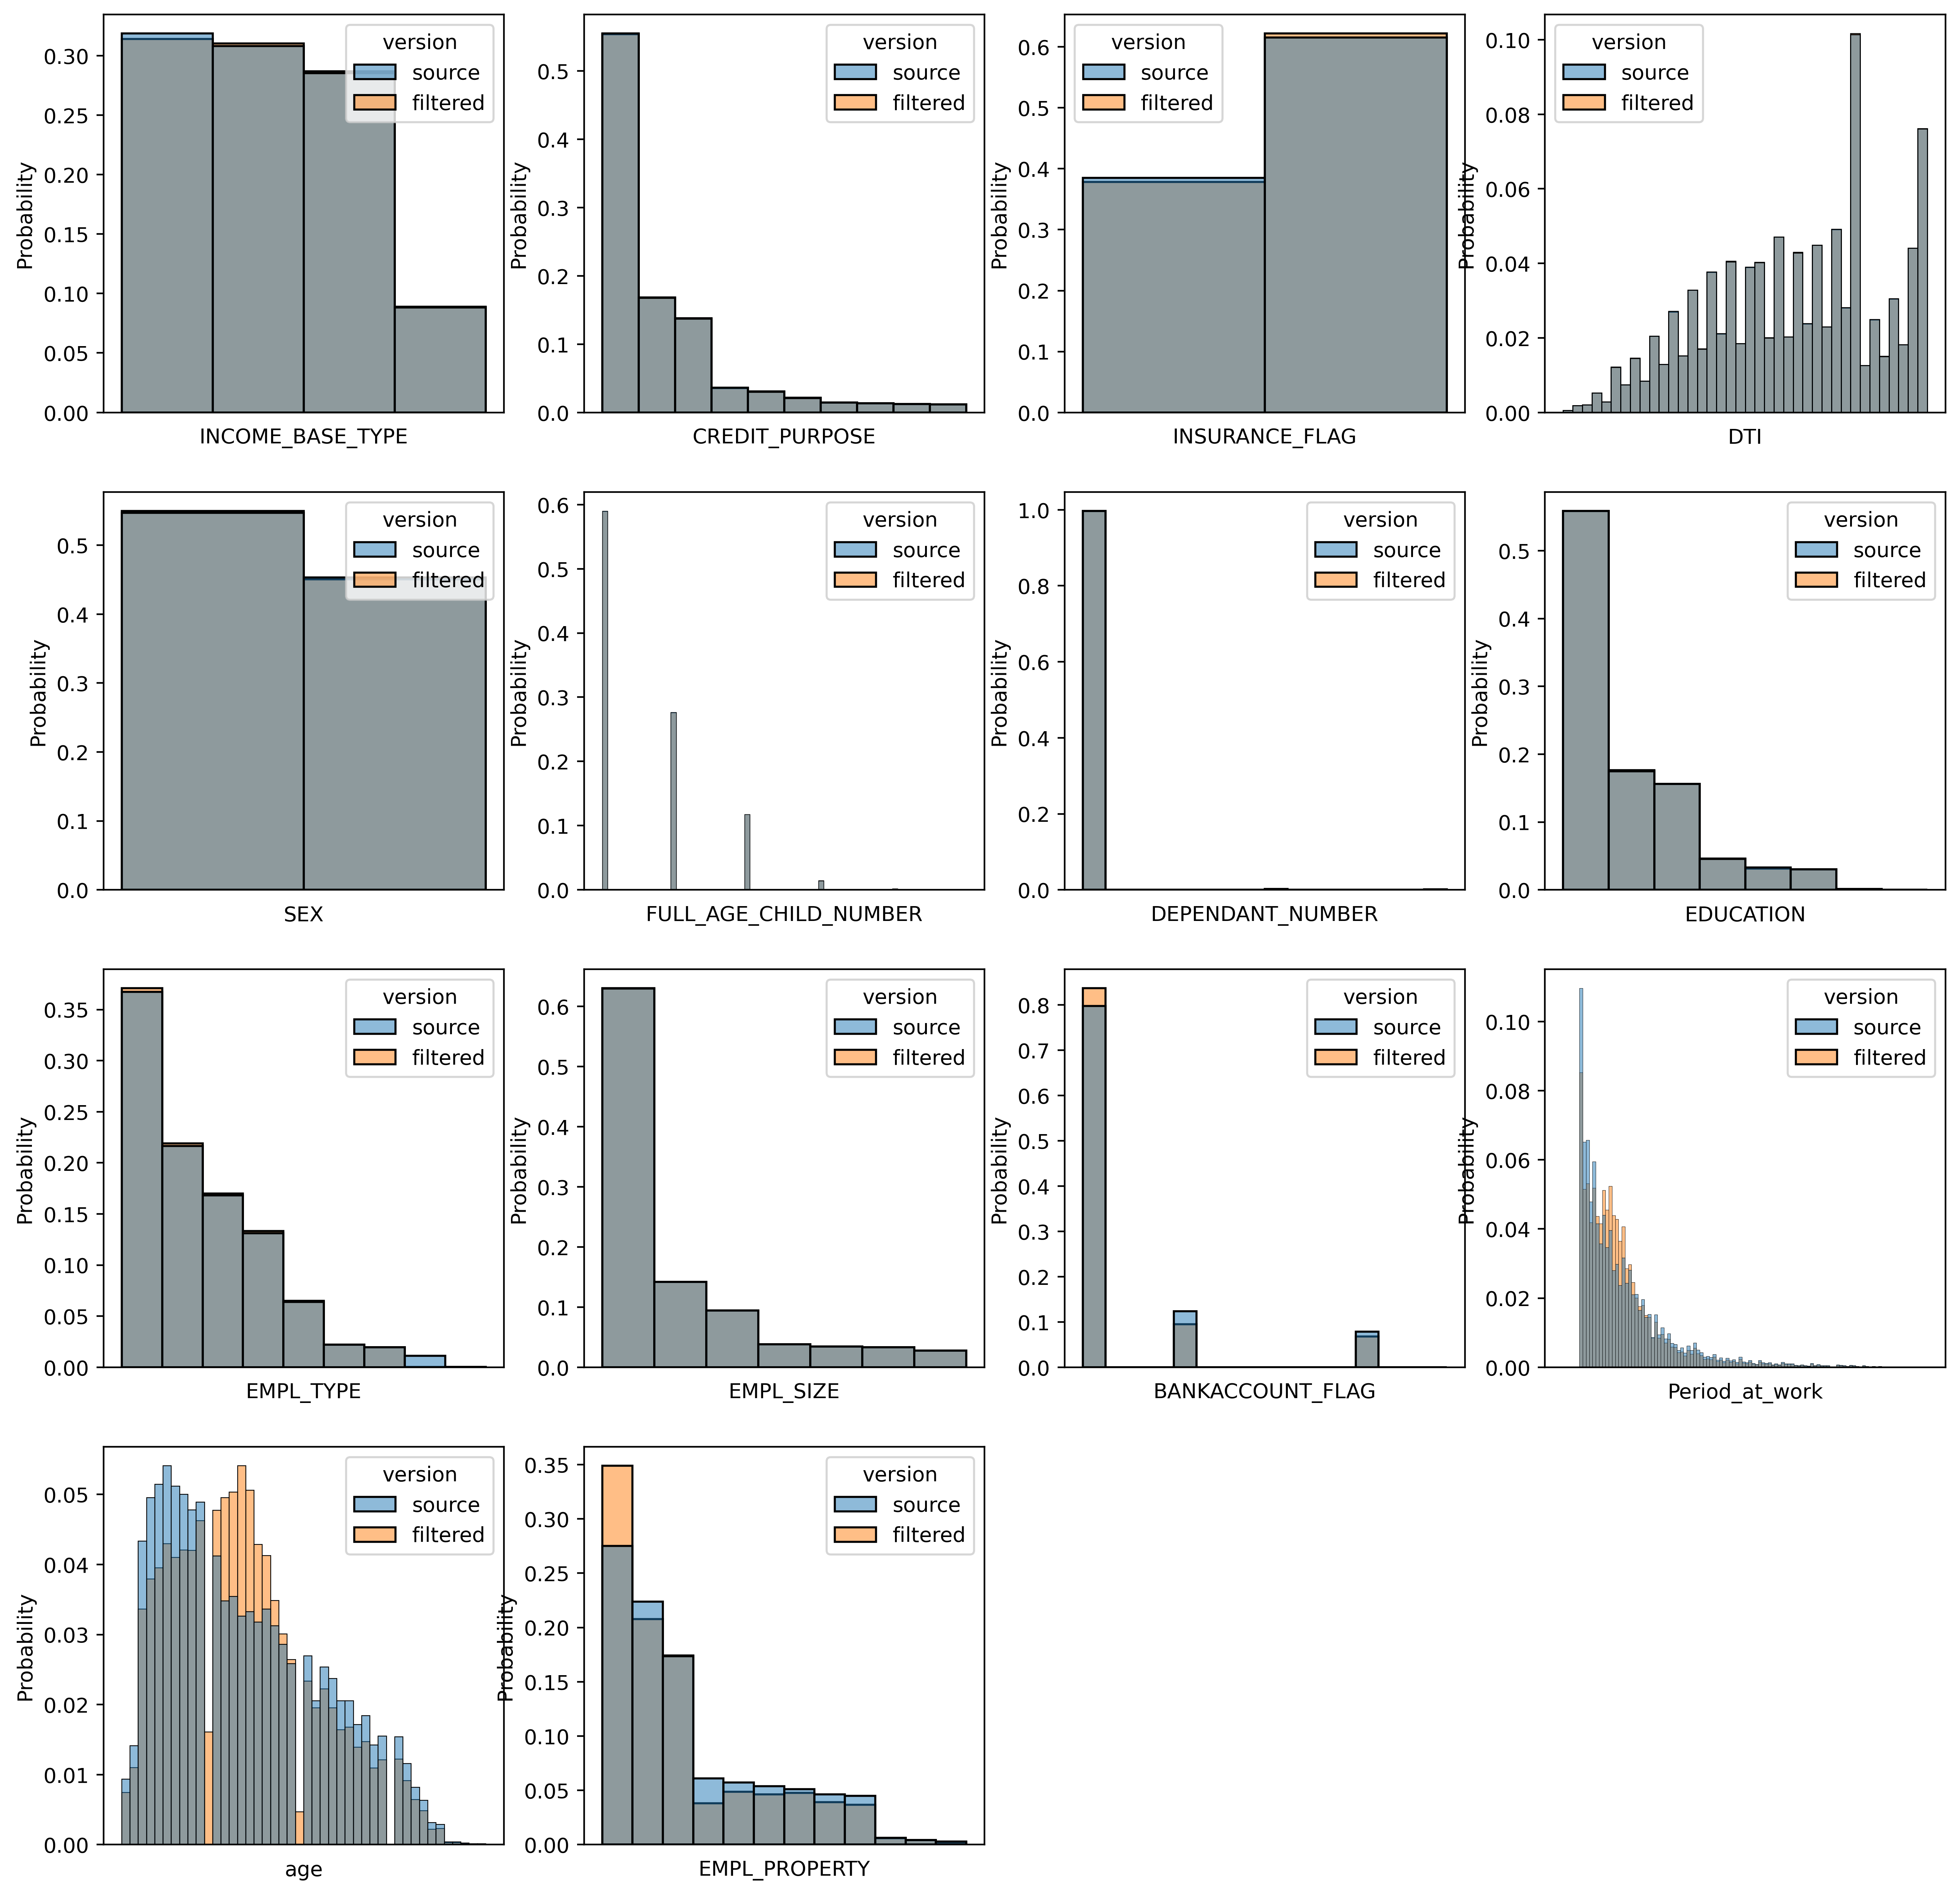

In [32]:
filtered = df2.dropna()
print(f'размер исходной выборки: {df.shape[0]}')
print(f'размер новой выборки:    {filtered.shape[0]}, что является {round(100*filtered.shape[0]/df.shape[0], 1)}% от исходной')

features = df.columns[:14]
n_columns = round(np.sqrt(features.shape[0]))
n_rows = (features.shape[0]+n_columns-1) // n_columns

plt.figure(figsize=(16, 16), dpi=400)

for num, column in enumerate(features):
    plt.subplot(n_rows, n_columns, num+1)
    
    cur_source = df[column].dropna()
    cur_filtered = filtered[column].dropna()
    
    tmp=pd.DataFrame(columns=[column])
    tmp[column]=np.concatenate([cur_source, cur_filtered])
    tmp['version'] = ['source' if i < cur_source.shape[0] else 'filtered' for i in tmp.index]
    
    if column in categorical_features:
        tmp[column] = pd.Categorical(tmp[column], tmp[column][tmp['version'] == 'source'].value_counts(dropna=False).index.to_list())

    sns.histplot(data=tmp, x=column, hue='version', stat='probability', common_norm=False)
    plt.xticks([])
        
        
plt.show()

Как видим, теперь в нашей выборке представлены те же слои общества что и в исходной выборке, однако распределения немного нарушены. Таким образом мы с меньшей вероятностью упустим заметные группы клиентов, однако при оценке размера построенных в будущем групп клиентов, нужно быть аккратным и принять во внимание смещенные распределения некоторых параметров.

Давайте проверим, удалось ли нам сохранить взаимосвзяь между переменными, чтобы проверить не создали ли мы случайно аномальных клиентов, которые после могут исказить нашу сегментацию.

Для этого построим карты корреляций между числовыми параметрами до заполнения недостающих полей и после.

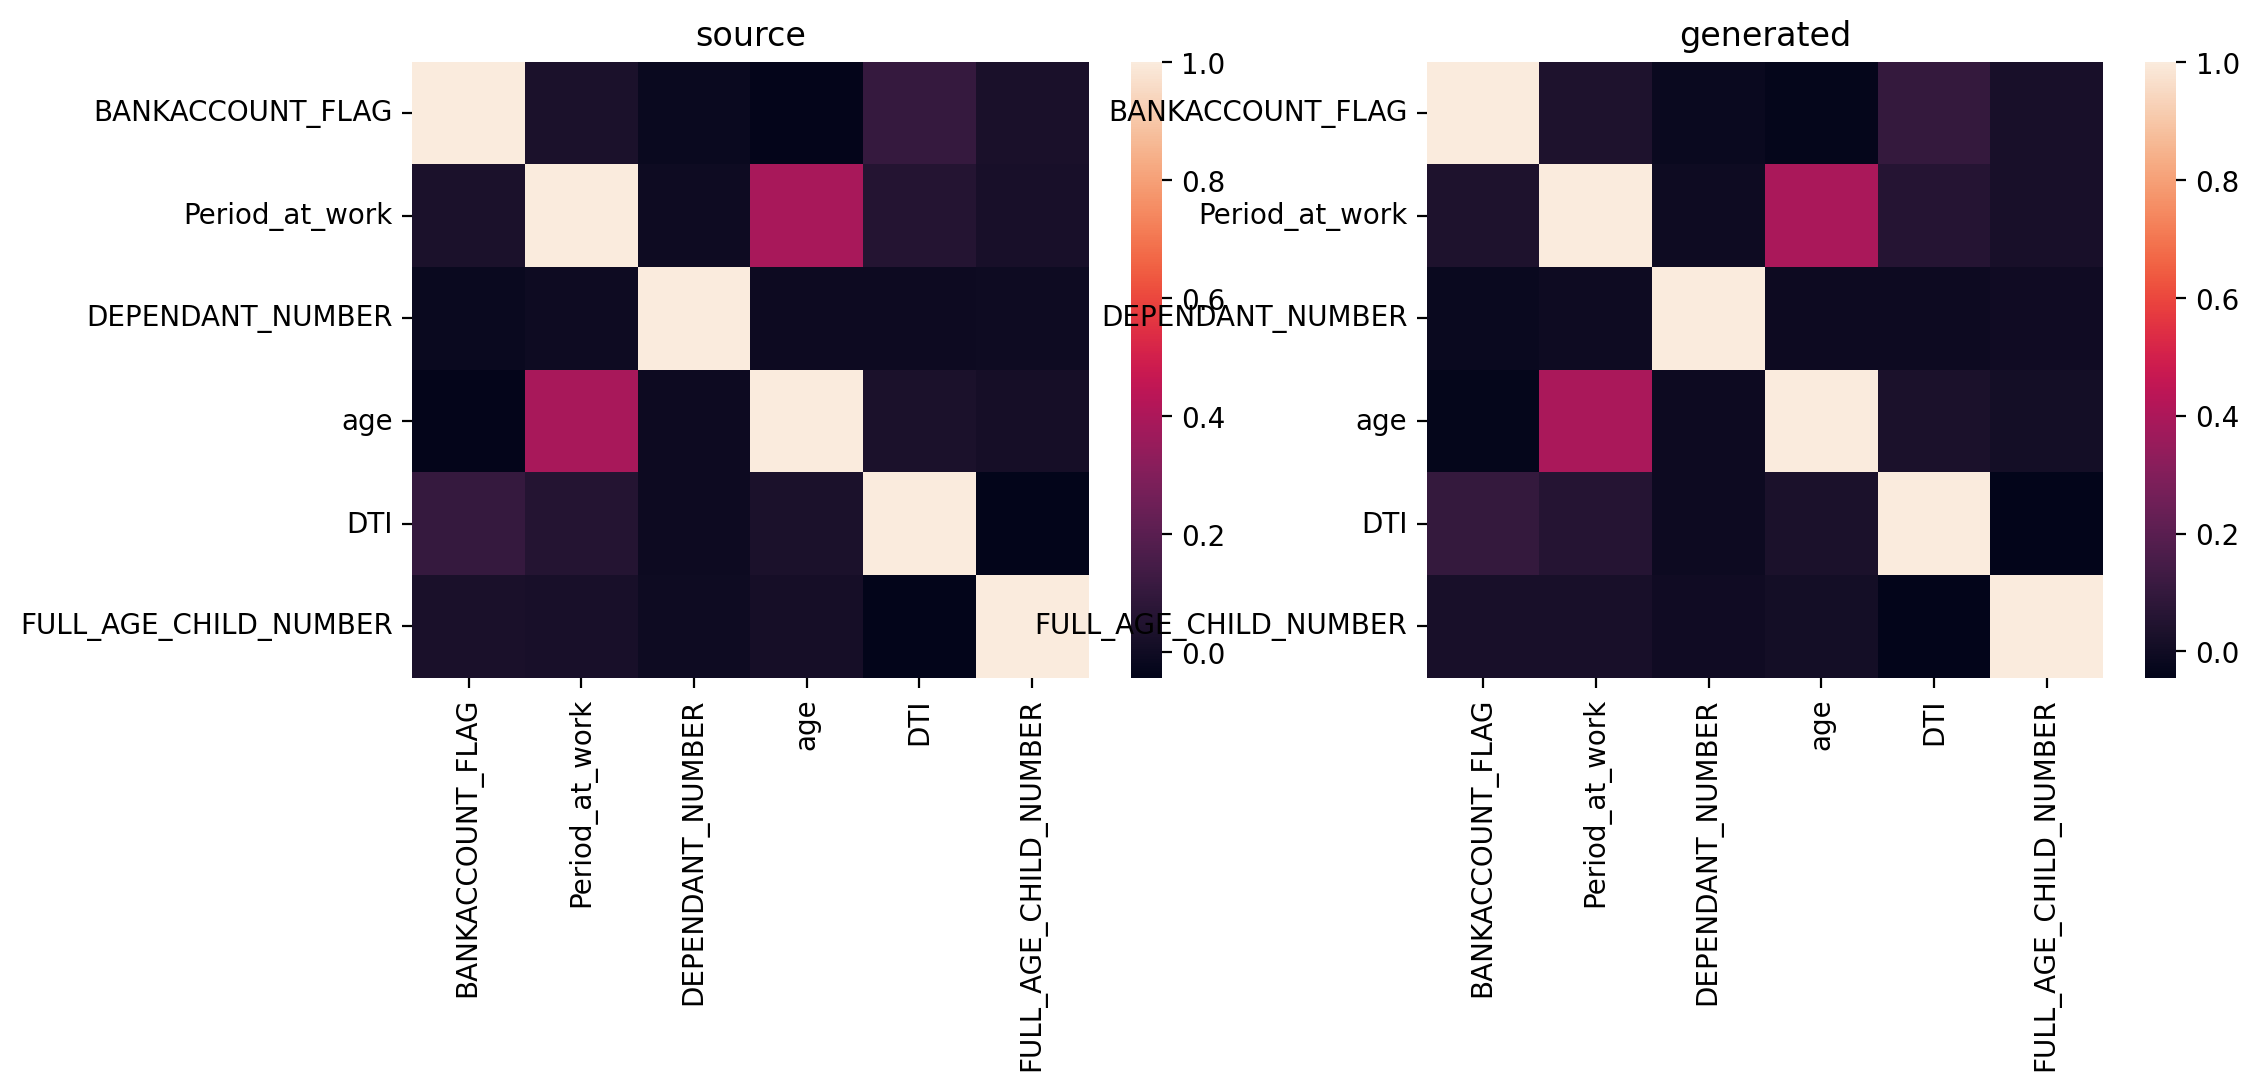

In [33]:
plt.figure(figsize=(12, 4), dpi=200)
plt.subplot(1, 2, 1)
plt.title('source')
sns.heatmap(df[list(set(numeric_features).intersection(set(df.columns)))].corr())
plt.subplot(1, 2, 2)
plt.title('generated')
sns.heatmap(filtered[list(set(numeric_features).intersection(set(df.columns)))].corr())
plt.show()

Заметим, что нам удалось сохранить заметную положительную связь между заполненными переменным `age` и `period_at_work`.

Проверим, также, что совместное распределение категориальных признаков `EMPL_PROPERTY` и `BANKACCOUNT_FLAG` значительно не изменилось. Для этого построим совместное распределение этих двух категориальных признаков. К сожалению, у меня не получилось построить два распределения на одной картинке. Также порядок профессий на двух картинках отличается (ось x), поэтому немного неудобно сранивать картинки.

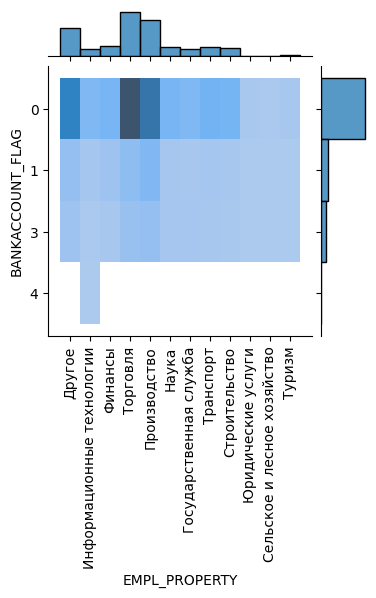

In [34]:
g = sns.jointplot(
    x=df['EMPL_PROPERTY'], 
    y=df['BANKACCOUNT_FLAG'].dropna().astype(int).astype('string'), 
    kind='hist',
    height=4)
g.ax_joint.set_xticks(list(df['EMPL_PROPERTY'].dropna().unique()))
plt.xticks(rotation=90)

plt.show()

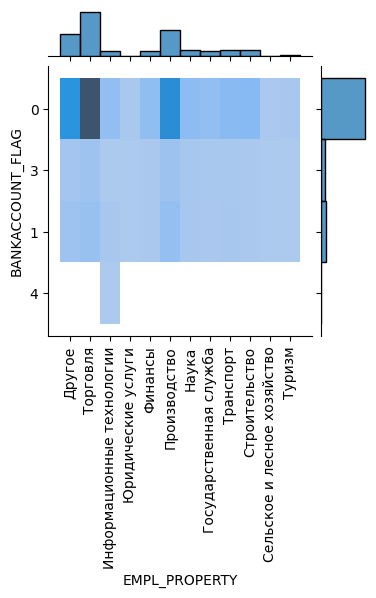

In [35]:
g=sns.jointplot(
    x=filtered['EMPL_PROPERTY'], 
    y=filtered['BANKACCOUNT_FLAG'].dropna().astype(int).astype('string'), 
    kind='hist',
    height=4)
plt.xticks(rotation=90)

plt.show()

Видим, что в целом совместное распределение изменилось не сильно.

In [36]:
print('Итоговый датасет:')
filtered

Итоговый датасет:


INCOME_BASE_TYPE      CREDIT_PURPOSE  \
0               Поступление зарплаты на счет              Ремонт   
1               Поступление зарплаты на счет              Ремонт   
2               Поступление зарплаты на счет              Ремонт   
4                                      2НДФЛ              Ремонт   
5               Поступление зарплаты на счет  Покупка автомобиля   
...                                      ...                 ...   
10238                                  2НДФЛ              Ремонт   
10239  Форма банка (без печати работодателя)              Ремонт   
10240           Поступление зарплаты на счет              Ремонт   
10241  Форма банка (без печати работодателя)              Ремонт   
10242  Форма банка (без печати работодателя)              Ремонт   

       INSURANCE_FLAG   DTI      SEX  FULL_AGE_CHILD_NUMBER  DEPENDANT_NUMBER  \
0                 1.0  0.25  женский                      0                 0   
1                 0.0  0.37  женский                      0                 0   
2                 0.0  0.47  женский                      0                 0   
4                 1.0  0.28  мужской                      2                 0   
5                 1.0  0.56  женский                      0                 0   
...               ...   ...      ...                    ...               ...   
10238             1.0  0.39  мужской                      0                 0   
10239             1.0  0.42  мужской                      2                 0   
10240             1.0  0.49  женский                      0                 0   
10241             0.0  0.38  мужской                      1                 0   
10242             0.0  0.59  мужской                      0                 0   

                                 EDUCATION                EMPL_TYPE EMPL_SIZE  \
0                     незаконченное высшее                  рабочий      >250   
1                                   высшее  менеджер среднего звена      >=50   
2                                   высшее               специалист      >250   
4                      среднее-специальное                  рабочий      >250   
5                                  среднее               специалист      >250   
...                                    ...                      ...       ...   
10238                               высшее  менеджер среднего звена      >=50   
10239  Высшее/Второе высшее/Ученая степень   менеджер высшего звена      >250   
10240                               высшее  менеджер среднего звена      >250   
10241  Высшее/Второе высшее/Ученая степень               специалист      >=50   
10242                               высшее               специалист      >250   

       BANKACCOUNT_FLAG  Period_at_work        age              EMPL_PROPERTY  
0                   0.0       70.000000  50.000000                     Другое  
1                   0.0       54.085410  34.495896                   Торговля  
2                   0.0       10.000000  25.000000  Информационные технологии  
4                   0.0      174.000000  50.000000                     Другое  
5                   0.0       76.000000  27.000000                   Торговля  
...                 ...             ...        ...                        ...  
10238               0.0       62.032796  35.625933                   Торговля  
10239               0.0       73.000000  41.000000              Строительство  
10240               0.0       83.000000  41.000000                   Торговля  
10241               0.0       55.605644  36.201781                   Торговля  
10242               0.0        6.000000  31.000000               Производство  

[10074 rows x 14 columns]

Датасет не имеет пропусков. Для сегментации датасет будет закодирован по правилам описанным выше.

In [37]:
print(f'закодированный датасет имеет размеры: {encode(filtered).shape}')

закодированный датасет имеет размеры: (10074, 45)


Теперь давайте отнормируем наш закодированный датасет.

In [202]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
data = encode(filtered)
for i in range(data.shape[1]):
    data[:, i] = data[:, i] - data[:, i].mean(axis=0)
    data[:, i] = data[:, i] / data[:, i].std(axis=0)
# data = PCA().fit_transform(data)

In [203]:
# data = data[:, :2]

## k-means

### достоинства
- Легковесный и действенный метод для кластеризации данных, хорошо зарекомендовавший себя во многих областях
- Метод не требует специальных знаний по финансам (иногда это и минус)
- Предназначен для задач кластеризации: максимизизация однородности внутри сегмента, минимизация однородности между сегментами.

### недостатки
- чувствителен к стартовой иннициализации и масшатабированию
- нет возможности использовать дополнтельные "бизнесовые" знания

Теперь давайте кластеризуем нашу выборку с помощью k-means. Для того чтобы выбрать число кластеров измерим silhouette score для каждого числа кластеров от 2 до 10 включительно.

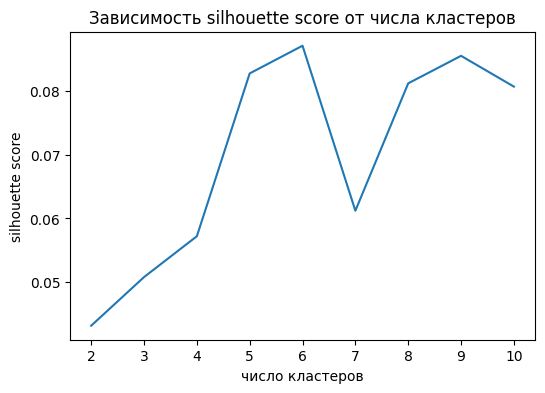

In [204]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
nums = list(range(2, 11))

for num_clusters in nums:
    kmeans = KMeans(n_clusters=num_clusters, random_state=5, n_init='auto').fit(data)
    labels = kmeans.predict(data)
    scores.append(silhouette_score(data, labels))
    
plt.figure(figsize=(6, 4), dpi=100)
plt.title('Зависимость silhouette score от числа кластеров')
plt.plot(nums, scores)
plt.xlabel('число кластеров')
plt.ylabel('silhouette score')
plt.show()

Как видим, оптимальное число кластеров является 2. Однако при маленьком числе кластеров наша сегменатци будет недостаточно подробной, поэтому не будем рассматривать число кластеров меньше 5. Тогда лучшим число кластеров будет 7.

In [214]:
cluster_count = 7
kmeans = KMeans(n_clusters=cluster_count, random_state=5, n_init='auto').fit(data)
labels = kmeans.predict(data)

In [206]:
_, counts = np.unique(labels, return_counts=True)
print(f'доли кластеров: {counts / labels.shape[0]}')

доли кластеров: [0.12993846 0.06452253 0.16716299 0.01965456 0.38544769 0.01181259
 0.22146119]


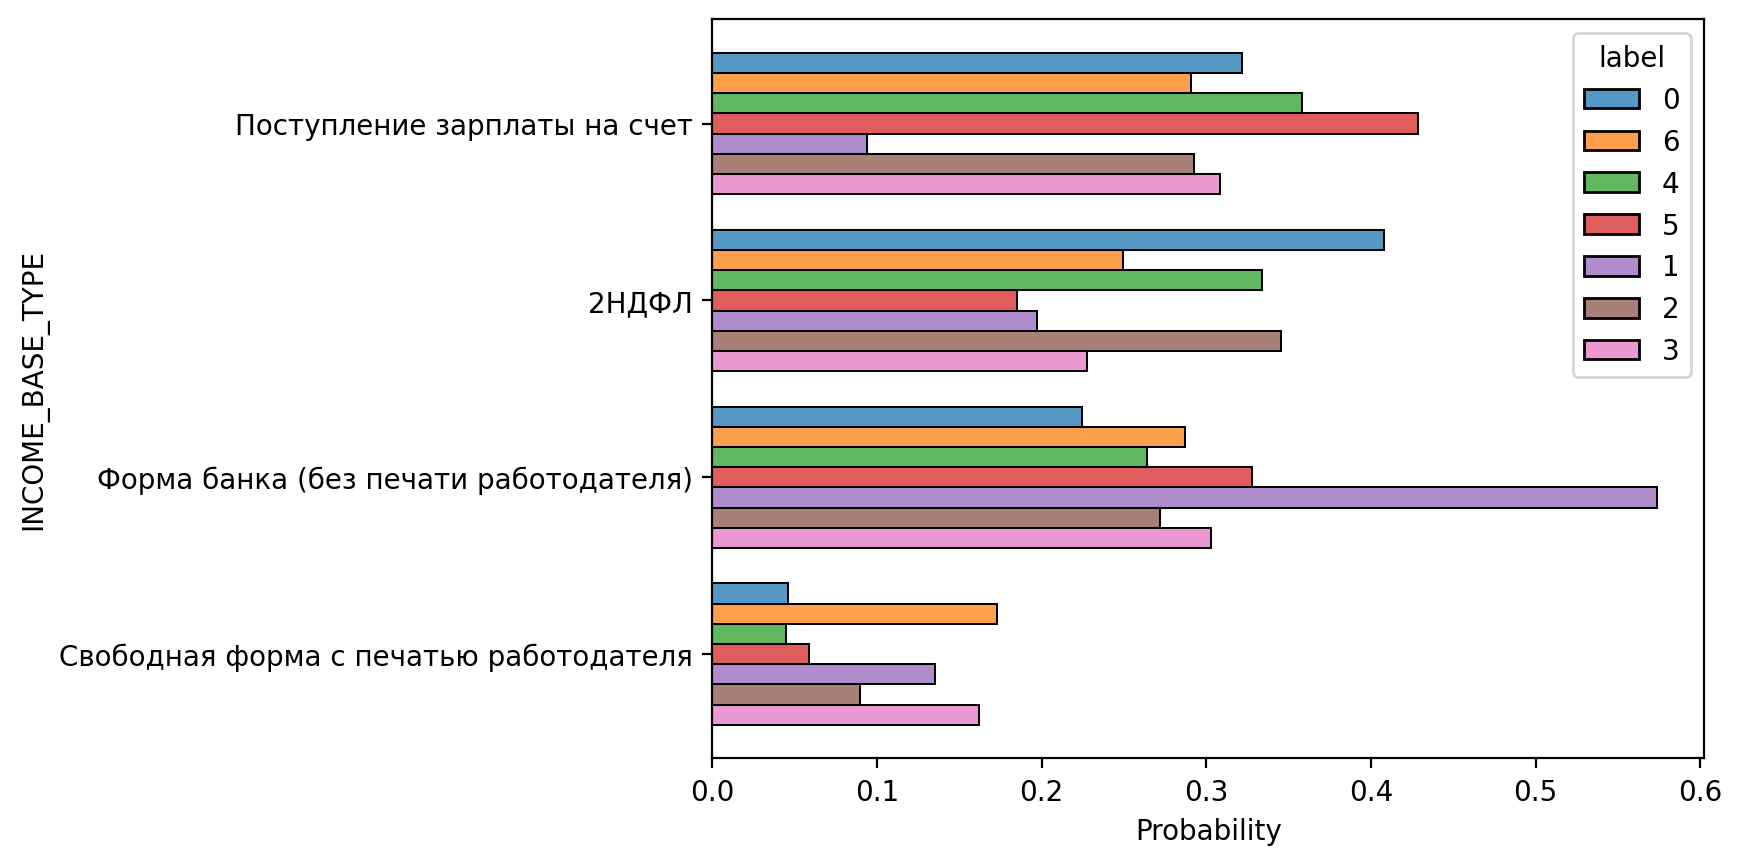

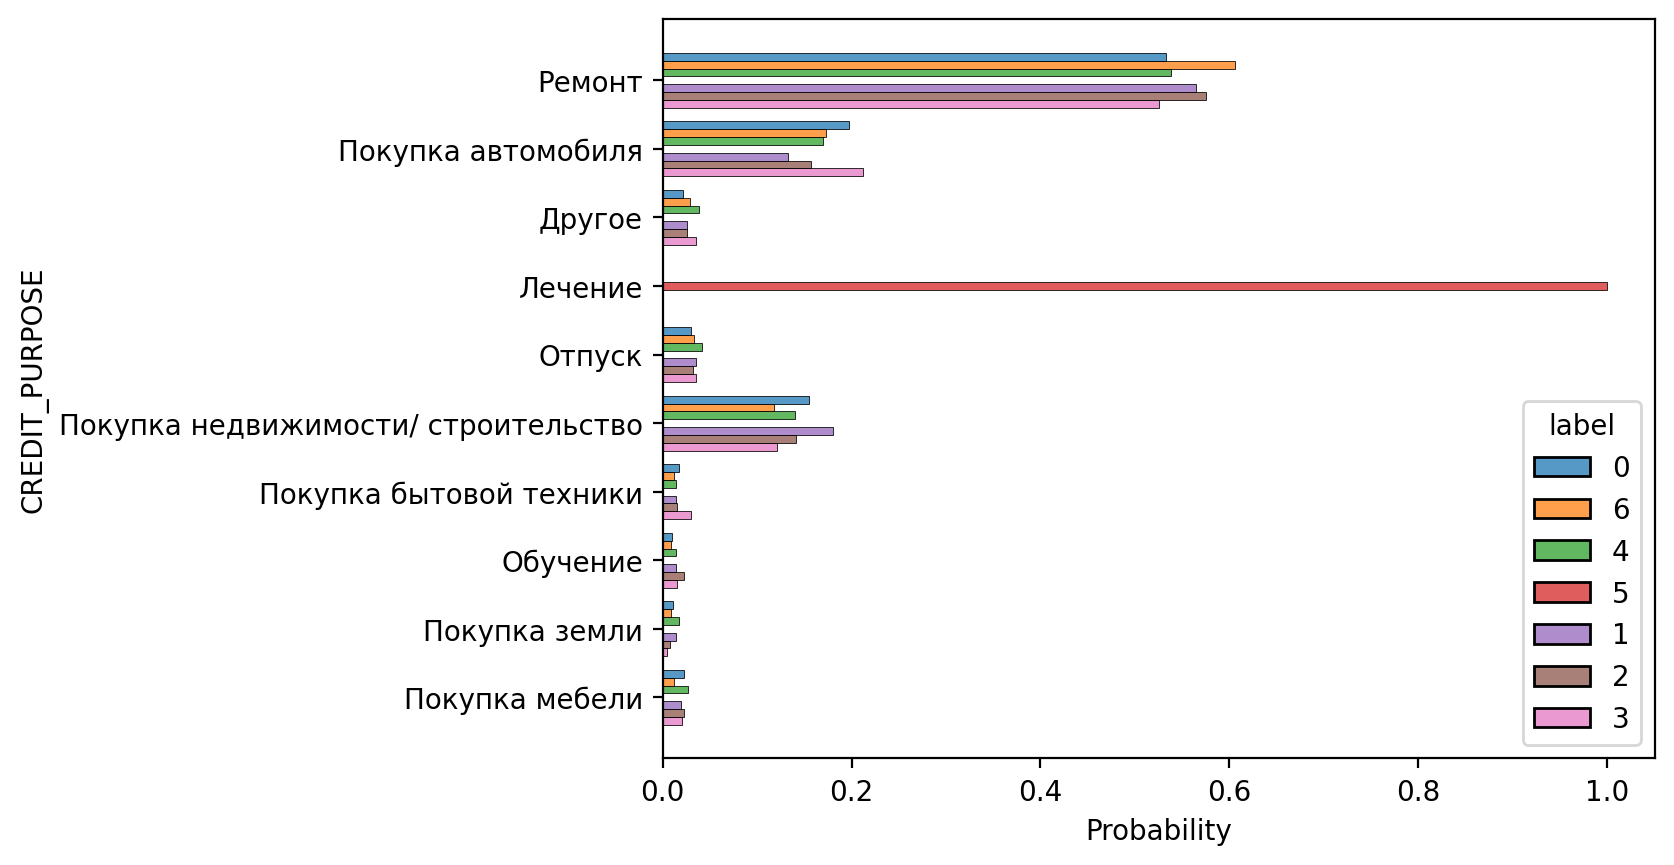

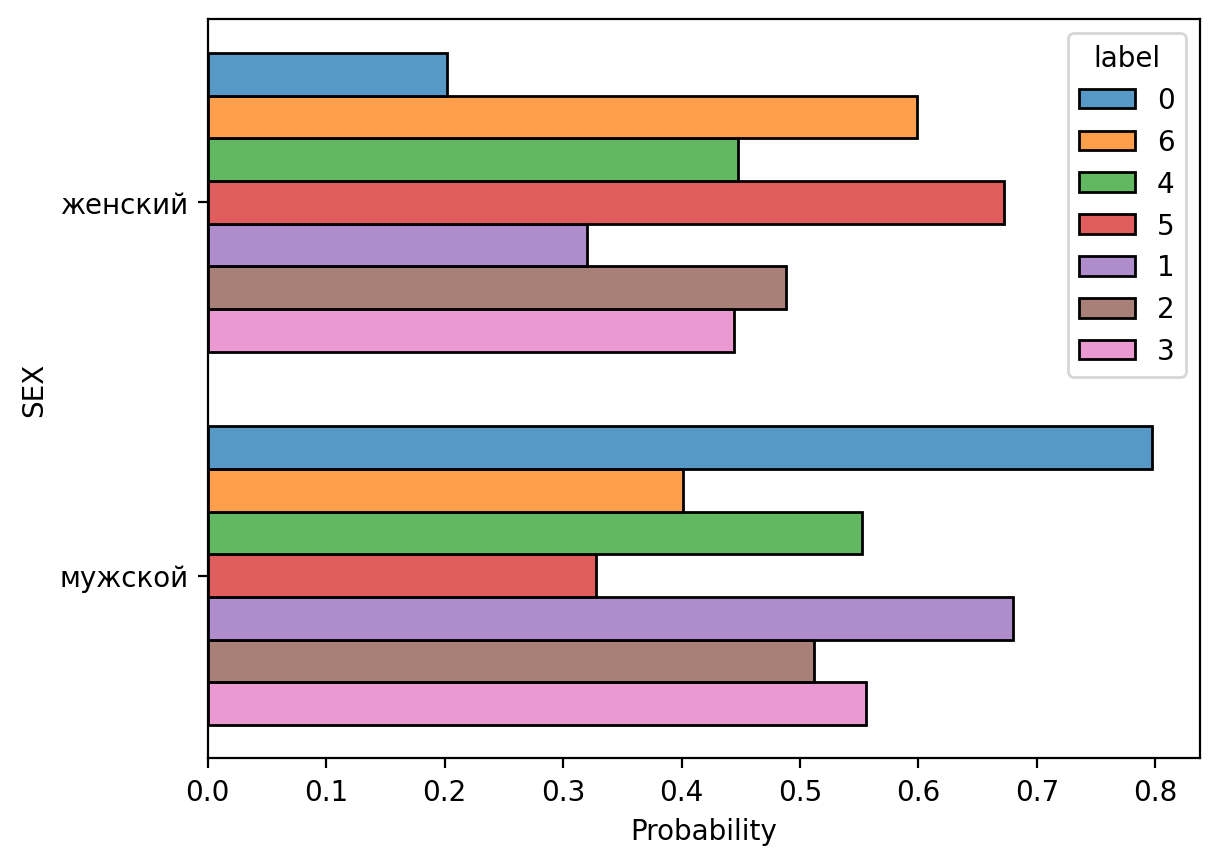

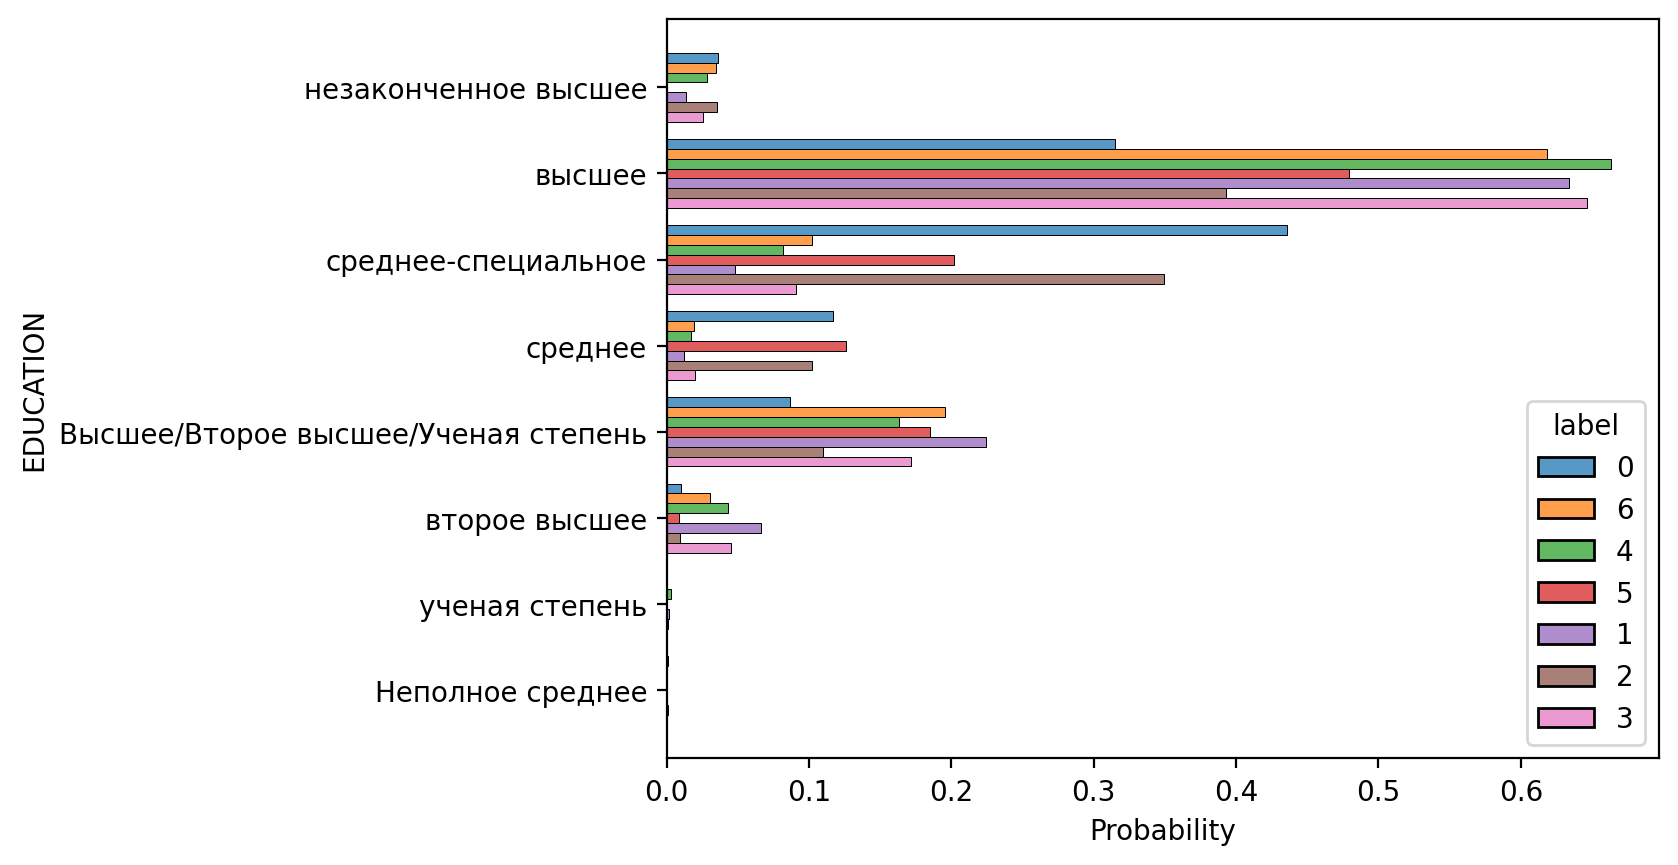

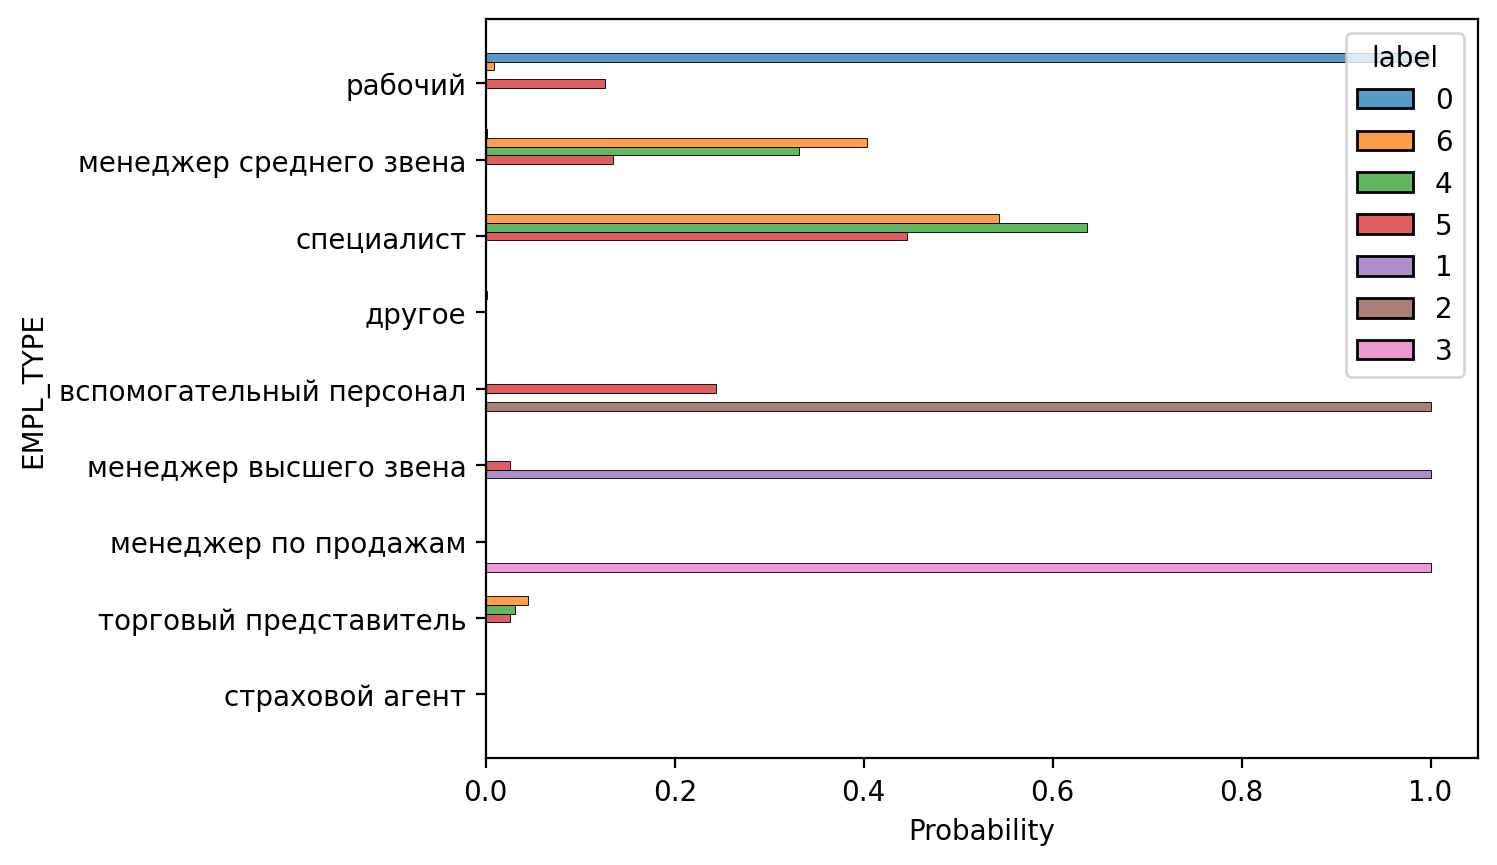

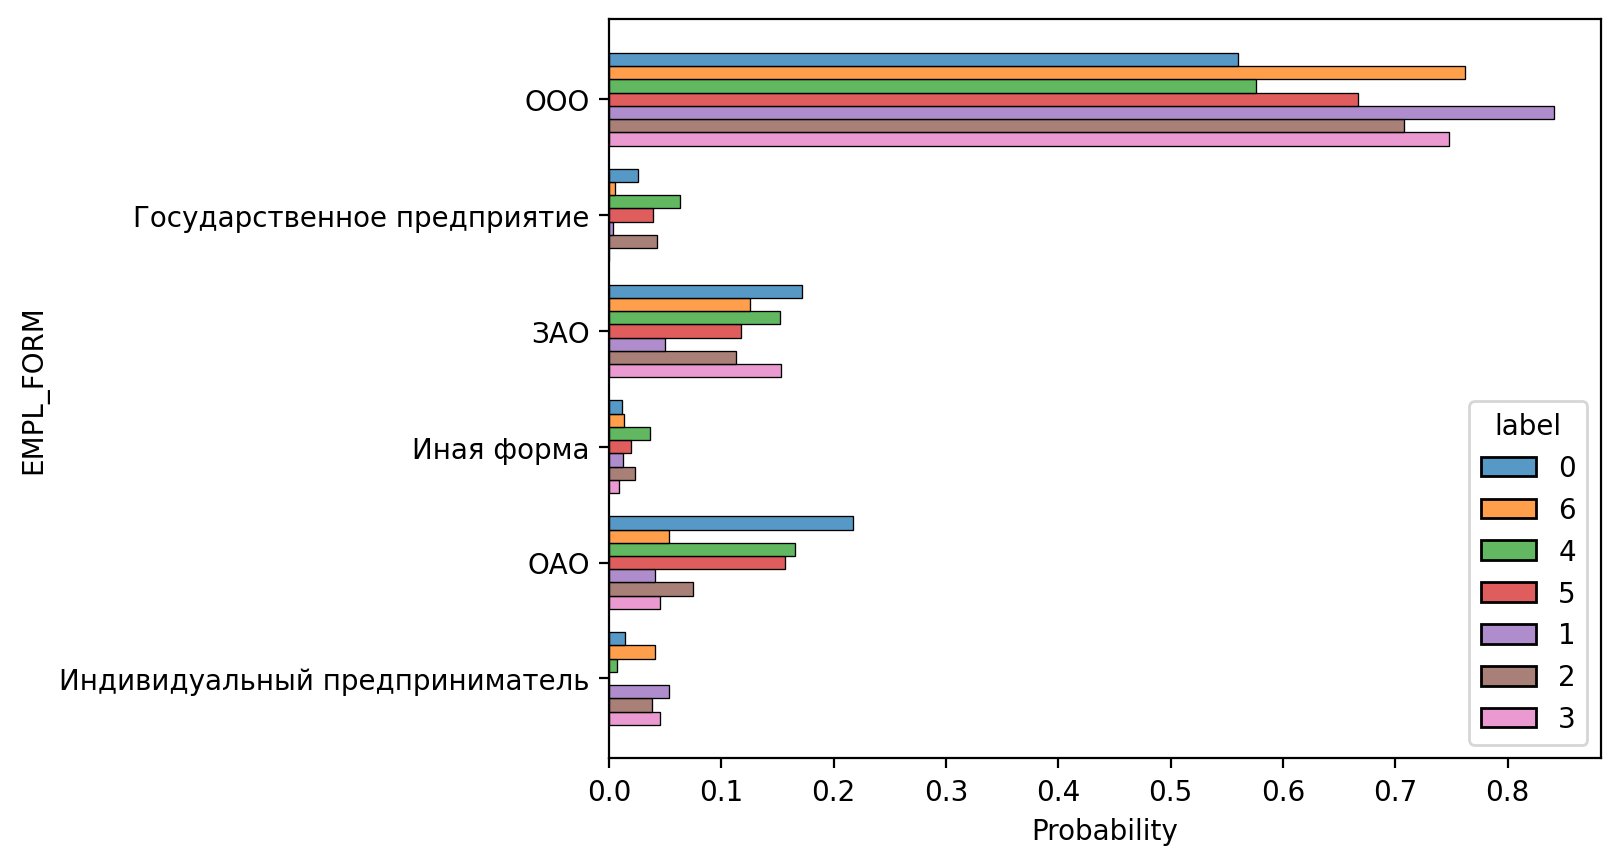

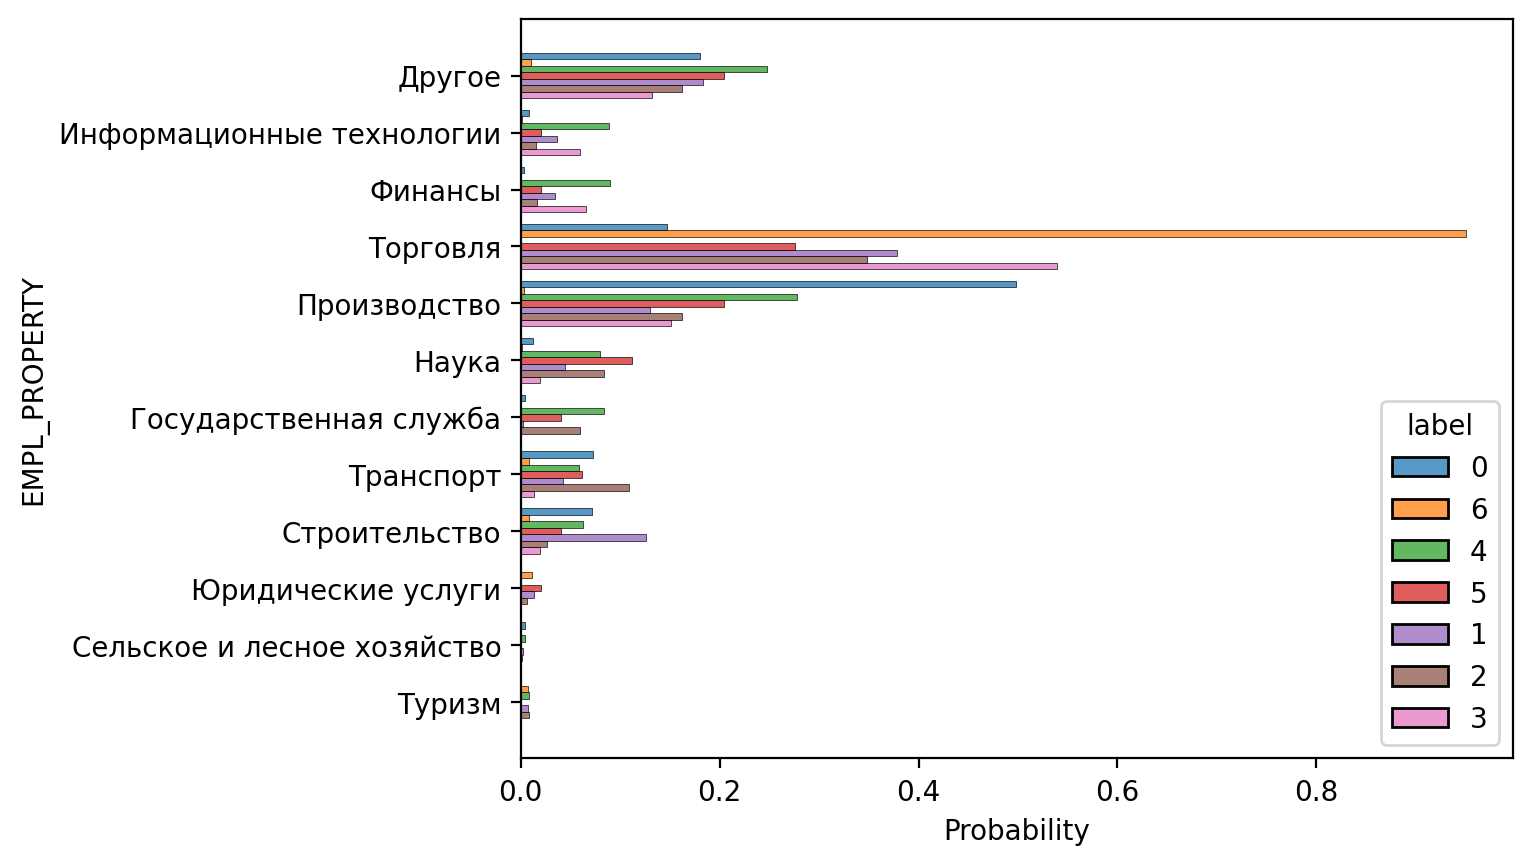

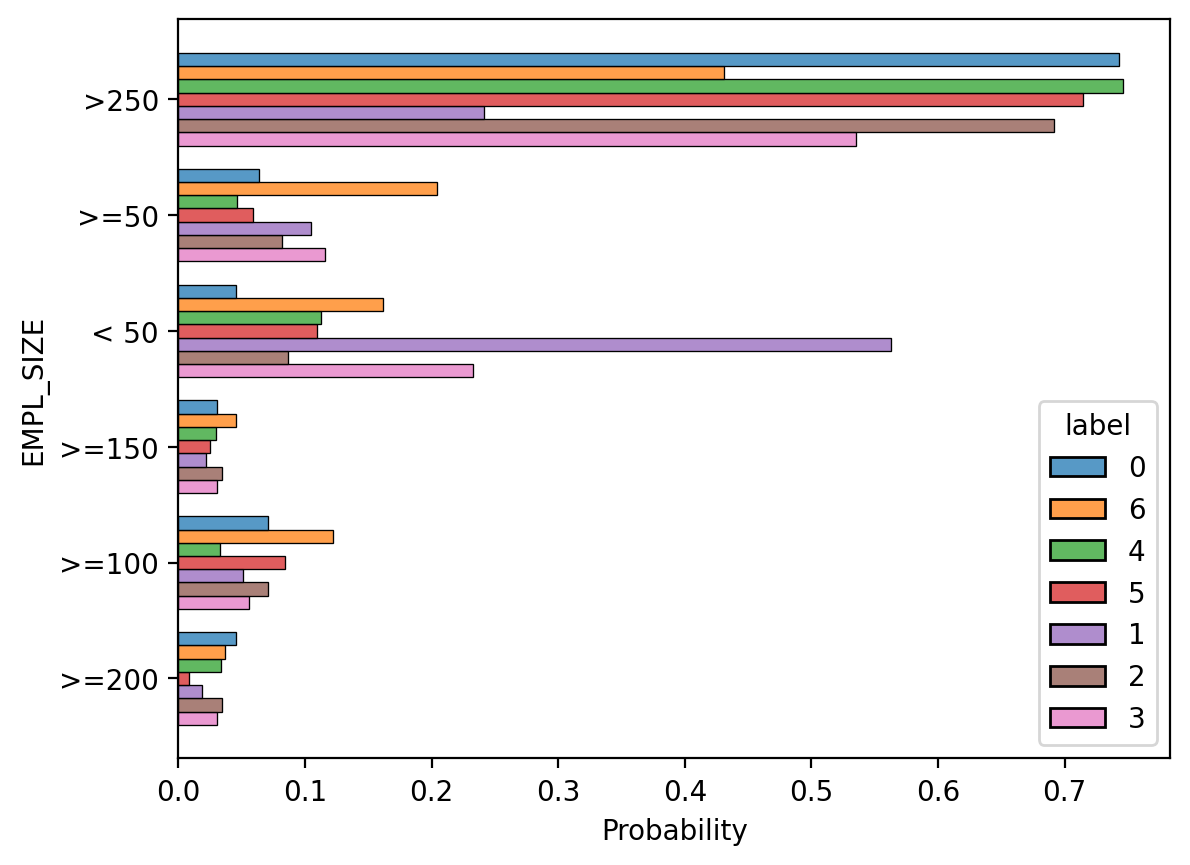

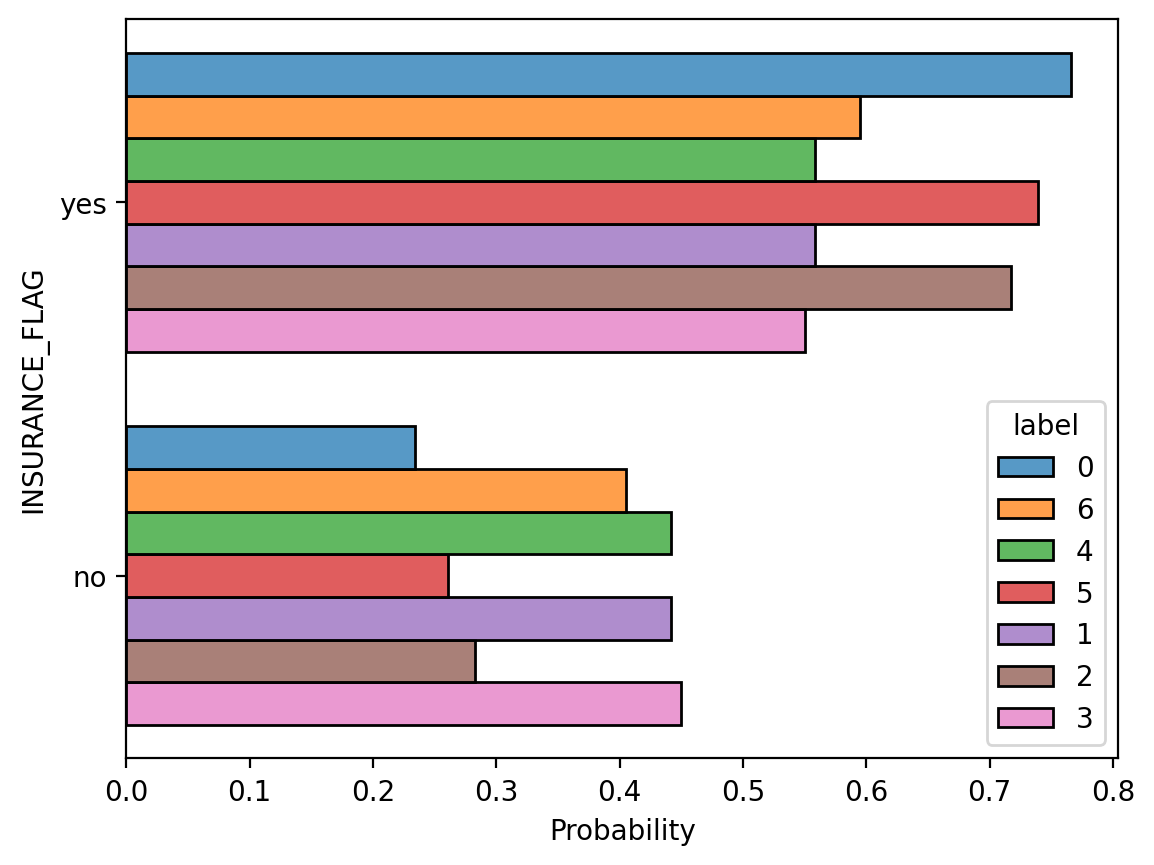

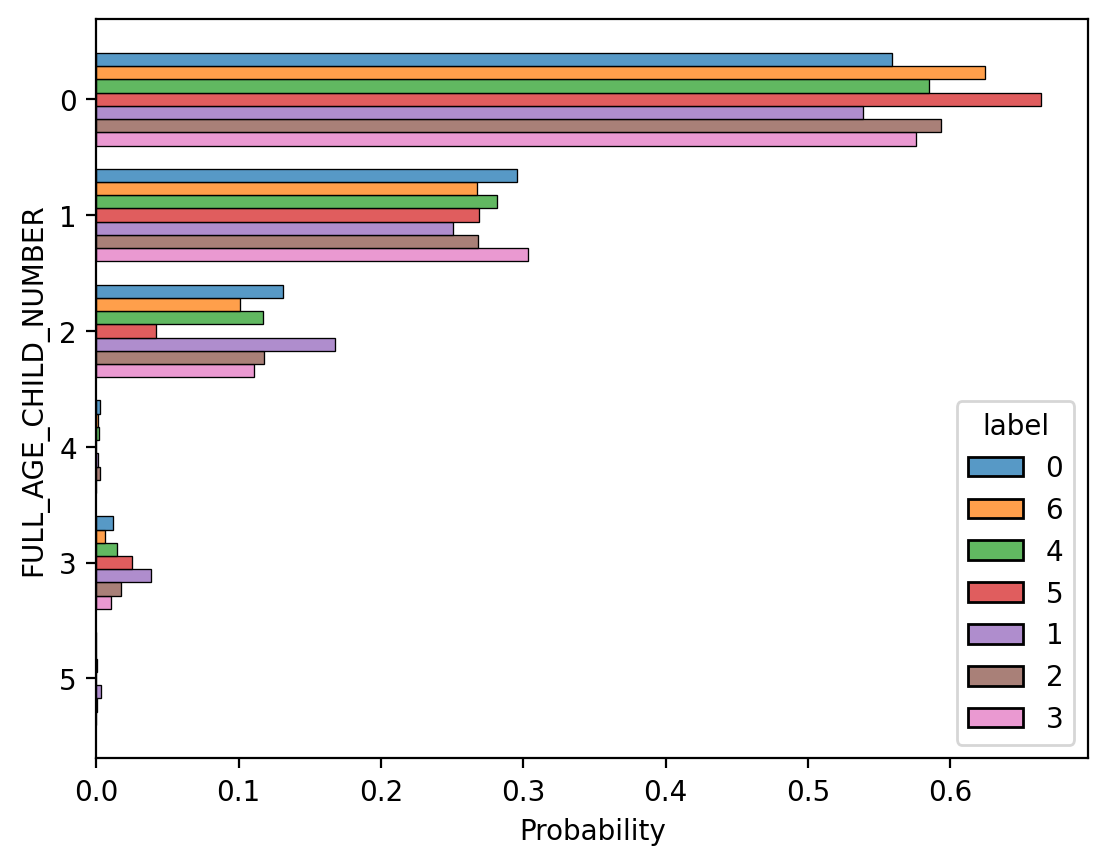

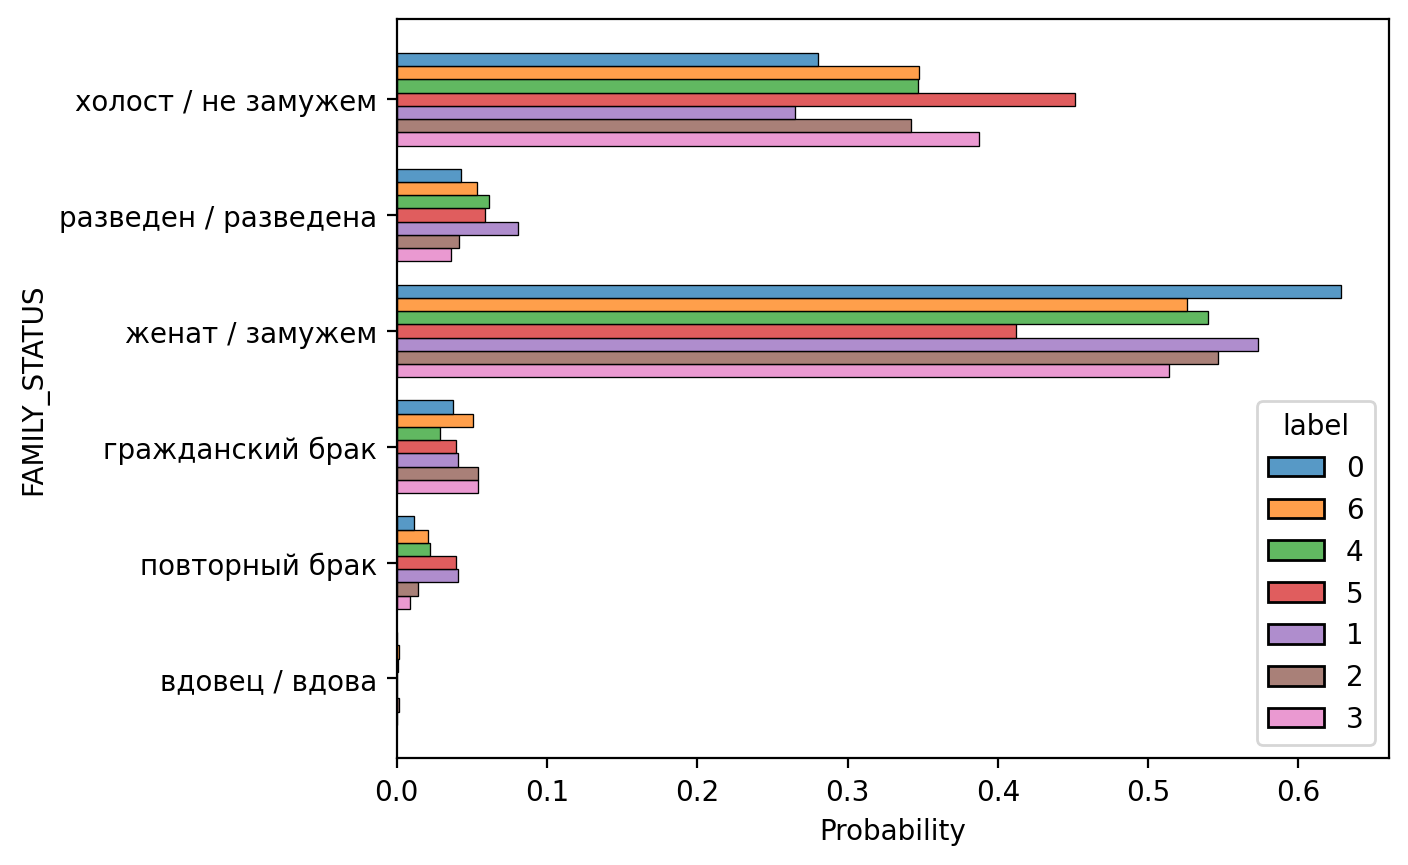

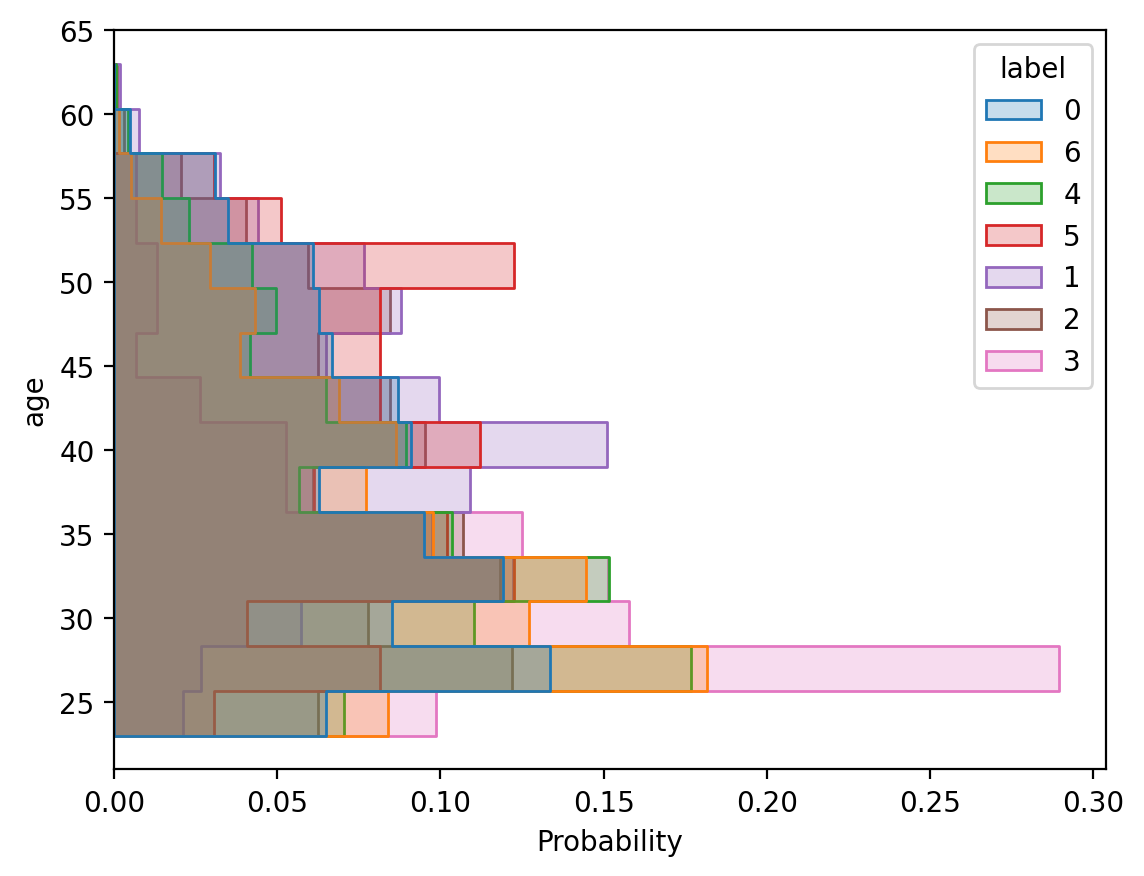

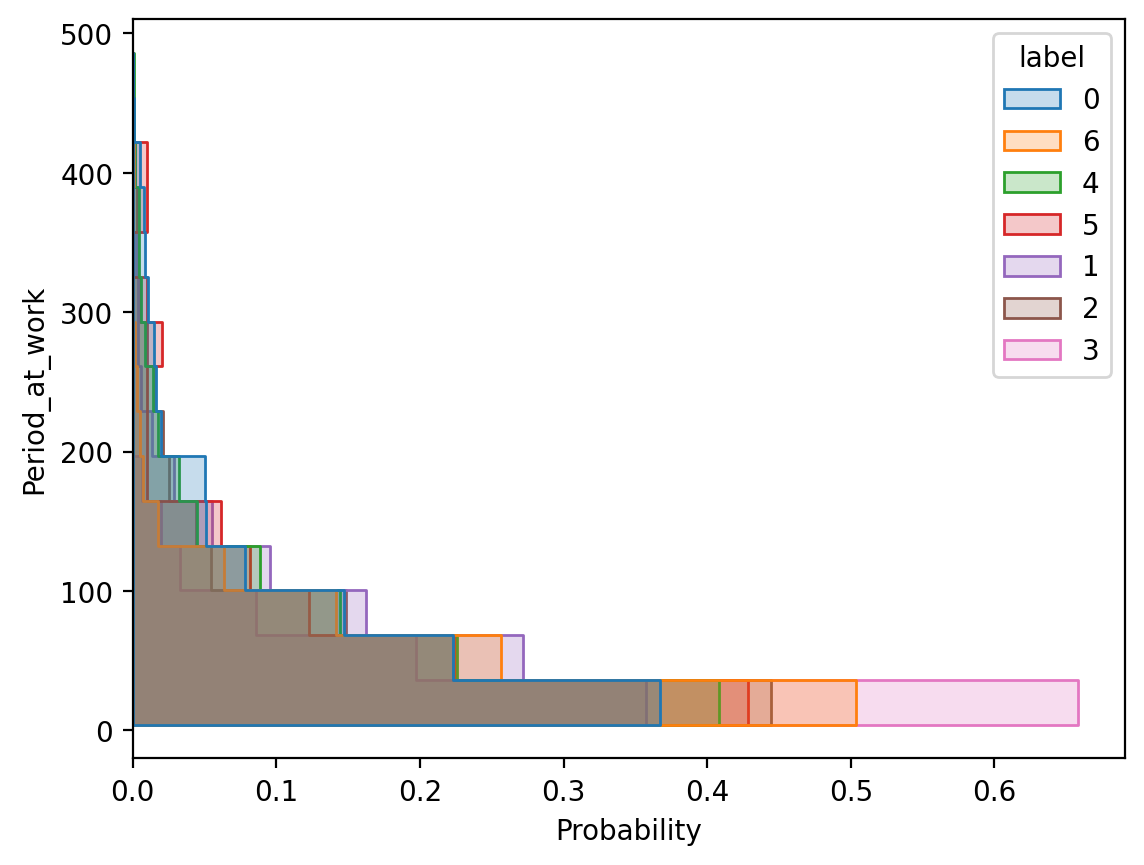

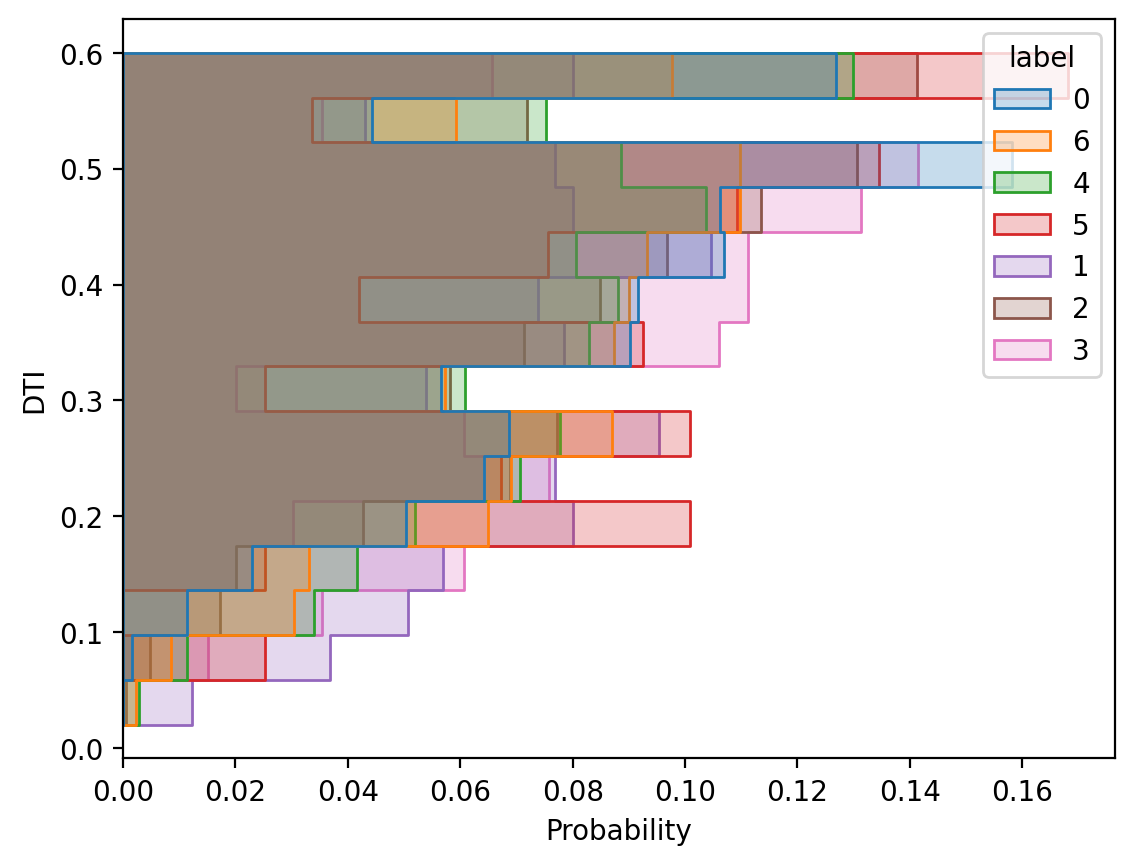

INCOME_BASE_TYPE CREDIT_PURPOSE      SEX  \
0                                  2НДФЛ         Ремонт  мужской   
1  Форма банка (без печати работодателя)         Ремонт  мужской   
2                                  2НДФЛ         Ремонт  мужской   
3           Поступление зарплаты на счет         Ремонт  мужской   
4           Поступление зарплаты на счет         Ремонт  мужской   
5           Поступление зарплаты на счет        Лечение  женский   
6           Поступление зарплаты на счет         Ремонт  женский   

             EDUCATION                 EMPL_TYPE EMPL_FORM EMPL_PROPERTY  \
0  среднее-специальное                   рабочий       ООО  Производство   
1               высшее    менеджер высшего звена       ООО      Торговля   
2               высшее  вспомогательный персонал       ООО      Торговля   
3               высшее      менеджер по продажам       ООО      Торговля   
4               высшее                специалист       ООО  Производство   
5               высшее                специалист       ООО      Торговля   
6               высшее                специалист       ООО      Торговля   

  EMPL_SIZE INSURANCE_FLAG FULL_AGE_CHILD_NUMBER        FAMILY_STATUS  \
0      >250            yes                     0      женат / замужем   
1      < 50            yes                     0      женат / замужем   
2      >250            yes                     0      женат / замужем   
3      >250            yes                     0      женат / замужем   
4      >250            yes                     0      женат / замужем   
5      >250            yes                     0  холост / не замужем   
6      >250            yes                     0      женат / замужем   

         age  Period_at_work       DTI  
0  37.591481       80.109390  0.404614  
1  40.426386       66.244742  0.340015  
2  37.860412       64.511823  0.407096  
3  31.592105       36.335526  0.376717  
4  35.487103       68.981687  0.385146  
5  40.132653       73.622449  0.390420  
6  34.502650       47.571537  0.379637

In [270]:
show_categorical = [
    'INCOME_BASE_TYPE',
    'CREDIT_PURPOSE',
    'SEX',
    'EDUCATION',
    'EMPL_TYPE',
    'EMPL_FORM',
    'EMPL_PROPERTY',
    'EMPL_SIZE',
    'INSURANCE_FLAG',
#     'DEPENDANT_NUMBER',
    'FULL_AGE_CHILD_NUMBER',
    'FAMILY_STATUS',
]

show_numeric = [
    'age',
    'Period_at_work',
    'DTI',
]

tmp1 = pd.read_csv('HW1_var_4.csv', delimiter=';').iloc[:, :18]
tmp = df.copy()
tmp['FAMILY_STATUS'] = tmp1['FAMILY_STATUS']
tmp['EMPL_FORM'] = tmp1['EMPL_FORM']
tmp['EMPL_SIZE'].replace('>100', '>=100', inplace=True)
tmp['INSURANCE_FLAG'] = tmp['INSURANCE_FLAG'].astype(str).replace({'1.0': 'yes', '0.0': 'no'})
tmp['FULL_AGE_CHILD_NUMBER'] = tmp['FULL_AGE_CHILD_NUMBER'].astype(str)

means = pd.DataFrame(columns=show_categorical + show_numeric, index=list(map(str, range(cluster_count))))

for num, column in enumerate(show_categorical):
    means[column] = tmp[column].groupby(by=tmp['label']).agg(pd.Series.mode)
    plt.figure(dpi=200)
    sns.histplot(data=tmp, y=column, hue='label', stat='probability', common_norm=False, multiple="dodge", shrink=.8)
    plt.show()
    
for num, column in enumerate(show_numeric):
    means[column] = tmp[column].groupby(by=tmp['label']).agg(pd.Series.mean)
    plt.figure(dpi=200)
    sns.histplot(data=tmp, y=column, hue='label', stat='probability', common_norm=False, element="step", bins=15)
    plt.show()
    
means

In [268]:
print('средние и наиболее частые значения:')
means

средние и наиболее частые значения:


INCOME_BASE_TYPE CREDIT_PURPOSE      SEX  \
0                                  2НДФЛ         Ремонт  мужской   
1  Форма банка (без печати работодателя)         Ремонт  мужской   
2                                  2НДФЛ         Ремонт  мужской   
3           Поступление зарплаты на счет         Ремонт  мужской   
4           Поступление зарплаты на счет         Ремонт  мужской   
5           Поступление зарплаты на счет        Лечение  женский   
6           Поступление зарплаты на счет         Ремонт  женский   

             EDUCATION                 EMPL_TYPE EMPL_FORM EMPL_PROPERTY  \
0  среднее-специальное                   рабочий       ООО  Производство   
1               высшее    менеджер высшего звена       ООО      Торговля   
2               высшее  вспомогательный персонал       ООО      Торговля   
3               высшее      менеджер по продажам       ООО      Торговля   
4               высшее                специалист       ООО  Производство   
5               высшее                специалист       ООО      Торговля   
6               высшее                специалист       ООО      Торговля   

  EMPL_SIZE INSURANCE_FLAG FULL_AGE_CHILD_NUMBER        FAMILY_STATUS  \
0      >250            yes                     0      женат / замужем   
1      < 50            yes                     0      женат / замужем   
2      >250            yes                     0      женат / замужем   
3      >250            yes                     0      женат / замужем   
4      >250            yes                     0      женат / замужем   
5      >250            yes                     0  холост / не замужем   
6      >250            yes                     0      женат / замужем   

         age  Period_at_work       DTI  
0  37.591481       80.109390  0.404614  
1  40.426386       66.244742  0.340015  
2  37.860412       64.511823  0.407096  
3  31.592105       36.335526  0.376717  
4  35.487103       68.981687  0.385146  
5  40.132653       73.622449  0.390420  
6  34.502650       47.571537  0.379637

Ну что же, дело за малым, интерпретировать наши классы. Поехали по порядку

### 0-Работяга

Мужчина, в браке, со средне-специальным образованием, рабочий, работающий на проивзодстве, получающий более 250 тыс. руб. Почти наверняка использовано страхование заемщика. На текущем рабочем месте работы в среднем работает дольше остальных клиентов. Высокая закредитованность.

### 1-Бизнесмен

Мужчина, с высшим образованием и, возможно, не одним, менеджер высшего звена в ООО. Как правило, зарплата приходит формой банка без печати работодателя. Самый низкий достаток, декларируемая зарплата не более 50 тыс. руб, вероятно уходит от налогов. Одна из самых возростных групп, длительное время не меняет работу. Наименьшая закредитованность.

### 2-Вспомогательный персонал.

Единственный яркий отличительный признак это занимаемая должность --- вспомогательный персонал. Также чаще чем в других группах встречаются представители со средне-специальным образованием, доля такого образования почти столько же сколько среди работяг.

### 3-Встающий на ноги.

Самая молодая группа. Яркий отличительный признак это занимаемая должность --- менеджер по продажам. Относительно других групп много представителей с высшим образованием. Часто меняет работу.

### 4-Образованный

Специалист, наибольшая доля в высшем образовании и чаще других групп работает на гос. службе и чуть реже работяг на производстве.

### 5-Несчастный(ая)

Цель кредита --- лечение. Женщина, чаще других одинока и не имеет совершеннолетних детей, в возрасте. Часто использовано страхование заемщика. Долго работает на одном месте.

### 6-Продавец

Работает в торговле. Относительно молод. Кредит чаще других берет на ремонт. Почти наверняка имеет высшее образование. Самая низкая зарплата после бизнесмена. Часто меняет работу.

## CatboostRegressor

### достоинства
- отличный метод для прогнозного сегментирования
- не чувствителен к масштабированию выборки

### недостатки
- чувствителен к выбору целевой переменной
- может быть сложно интерпретировать

Теперь используем обучение с учиетелм. В качестве целевой метрики используем DTI --- отношение долго к доходам, так как это наиболее близкий к финансам показатель из имеющихся у нас. Сожмем датасет отнормировав и использовав PCA до 10ти признаков.

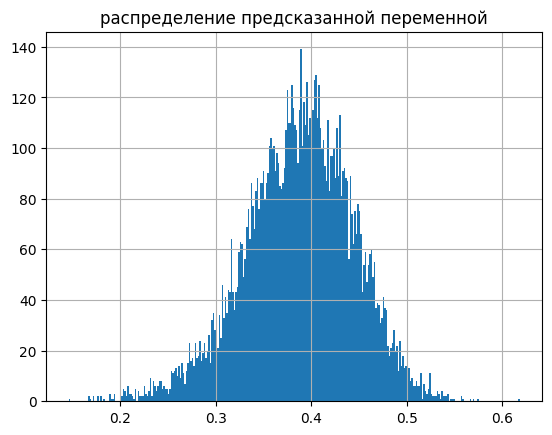

In [297]:
model = CatBoostRegressor(silent=True)

data = encode(filtered.drop(columns=['DTI']))

for i in range(data.shape[1]):
    data[:, i] = data[:, i] - data[:, i].mean(axis=0)
    data[:, i] = data[:, i] / data[:, i].std(axis=0)
data = PCA().fit_transform(data)[:, :10]

ans = filtered['DTI']
model.fit(data, ans)
pred = model.predict(data)

plt.title('распределение предсказанной переменной DTI')
pd.Series(pred).hist(bins=300)
plt.show()

Так как теперь у нас нет большого простора для формирования кластеров, то будем использовать небольшое количество кластеров, чтобы избежать похожих. Разделим нашу выборку по квантилям предсказанной величины на три части, каждая часть и будет отдельный кластер.

In [345]:
cluster_count = 3

filtered.loc[:, 'label'] = 0

for i in range(cluster_count):
    filtered.loc[pred > np.quantile(pred, (i+1)/cluster_count), 'label'] += 1
df['label'] = np.nan
df['label'] = filtered['label'].astype(int).astype(str)

/var/folders/fb/40014ldn20l9fct8wvjh2wqw0000gq/T/ipykernel_33665/665507568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.loc[:, 'label'] = 0


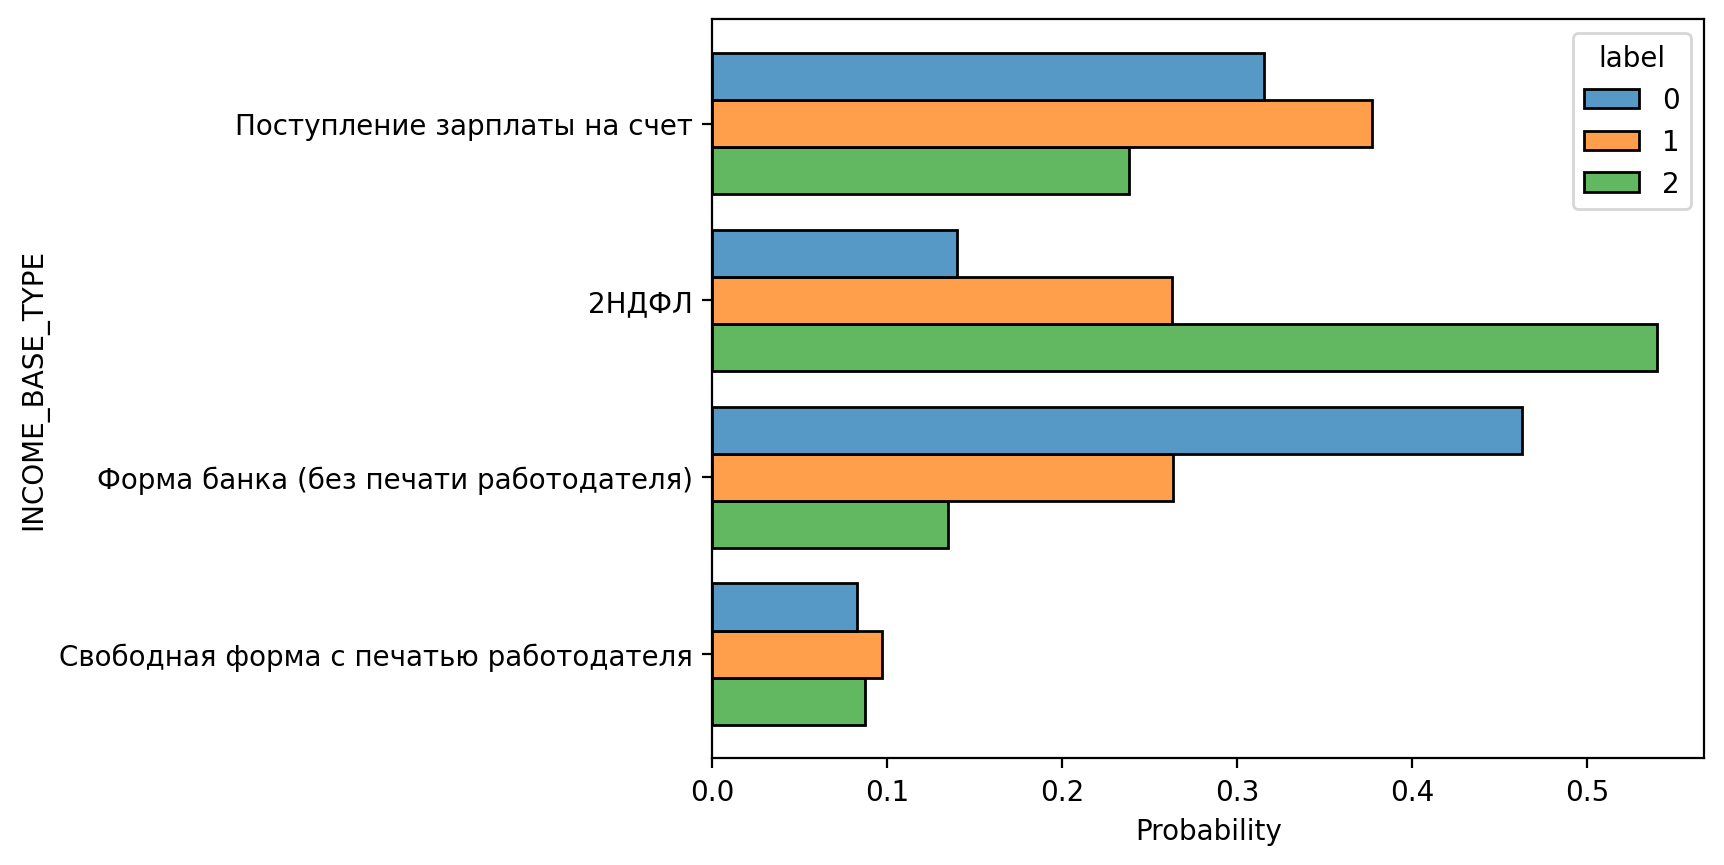

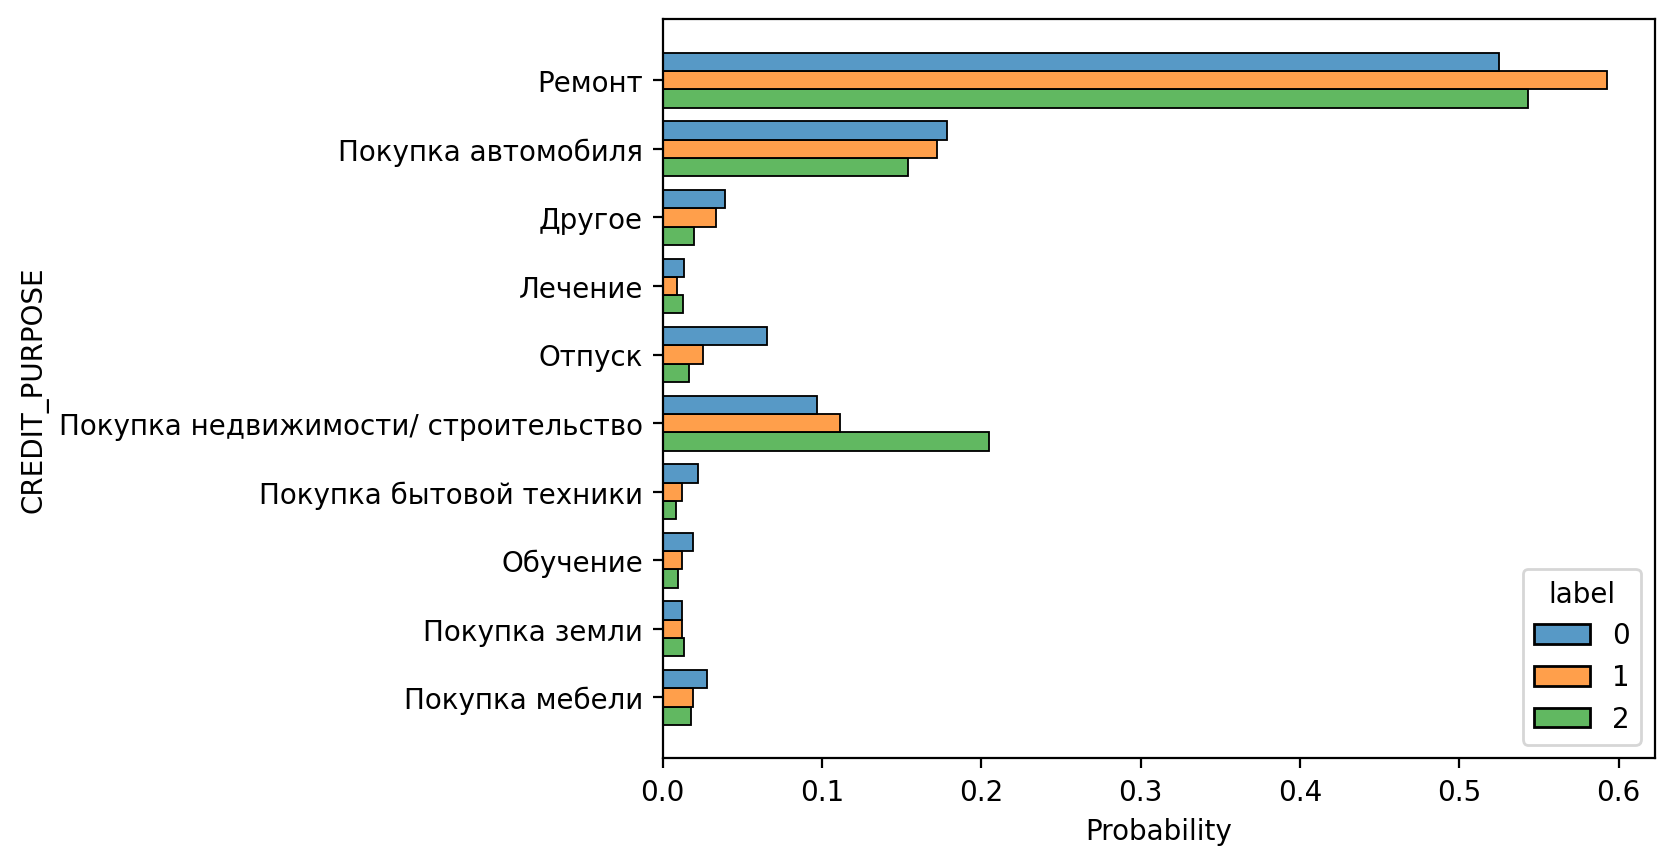

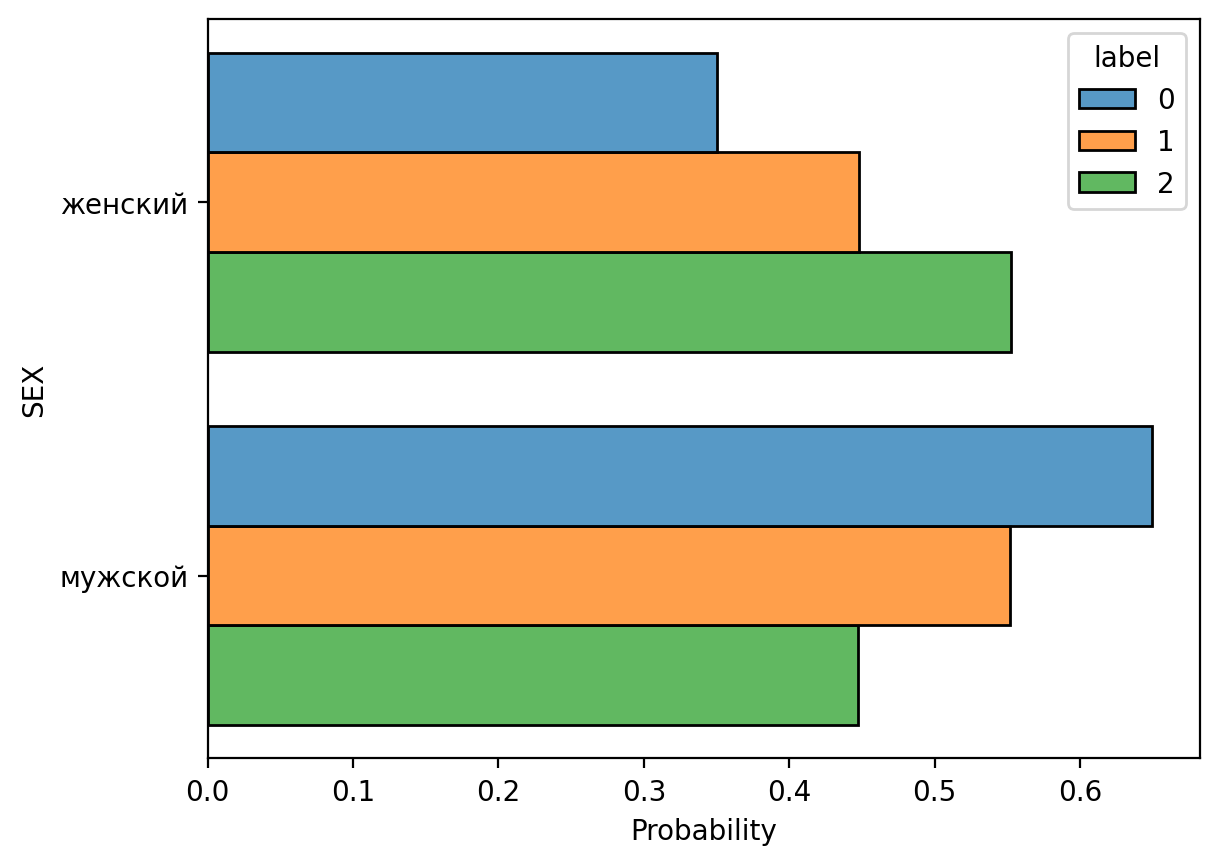

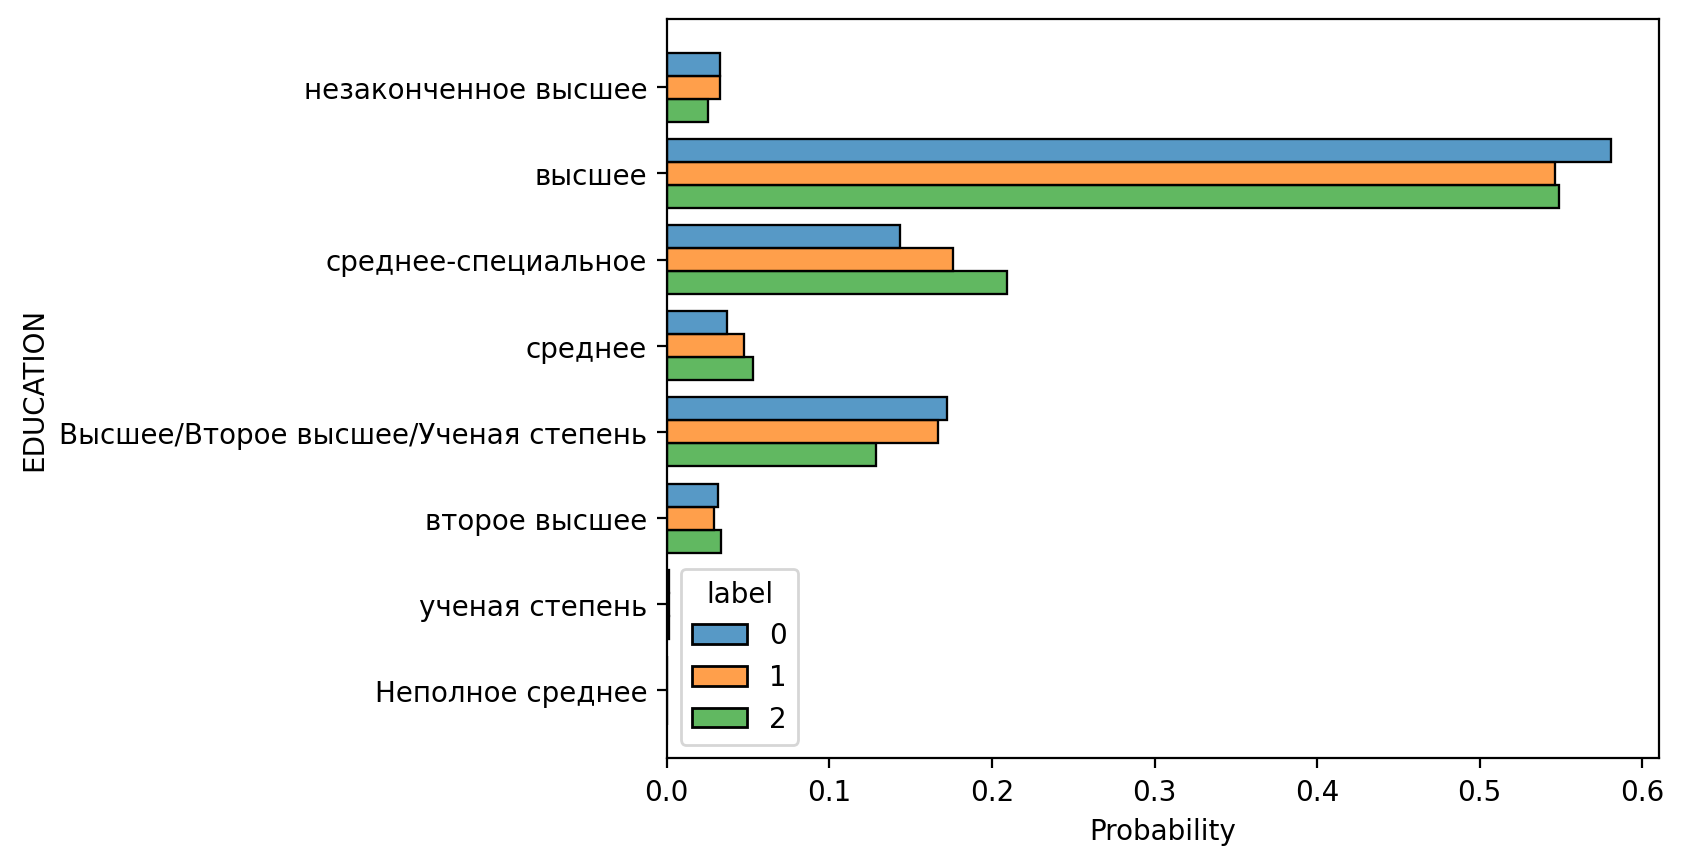

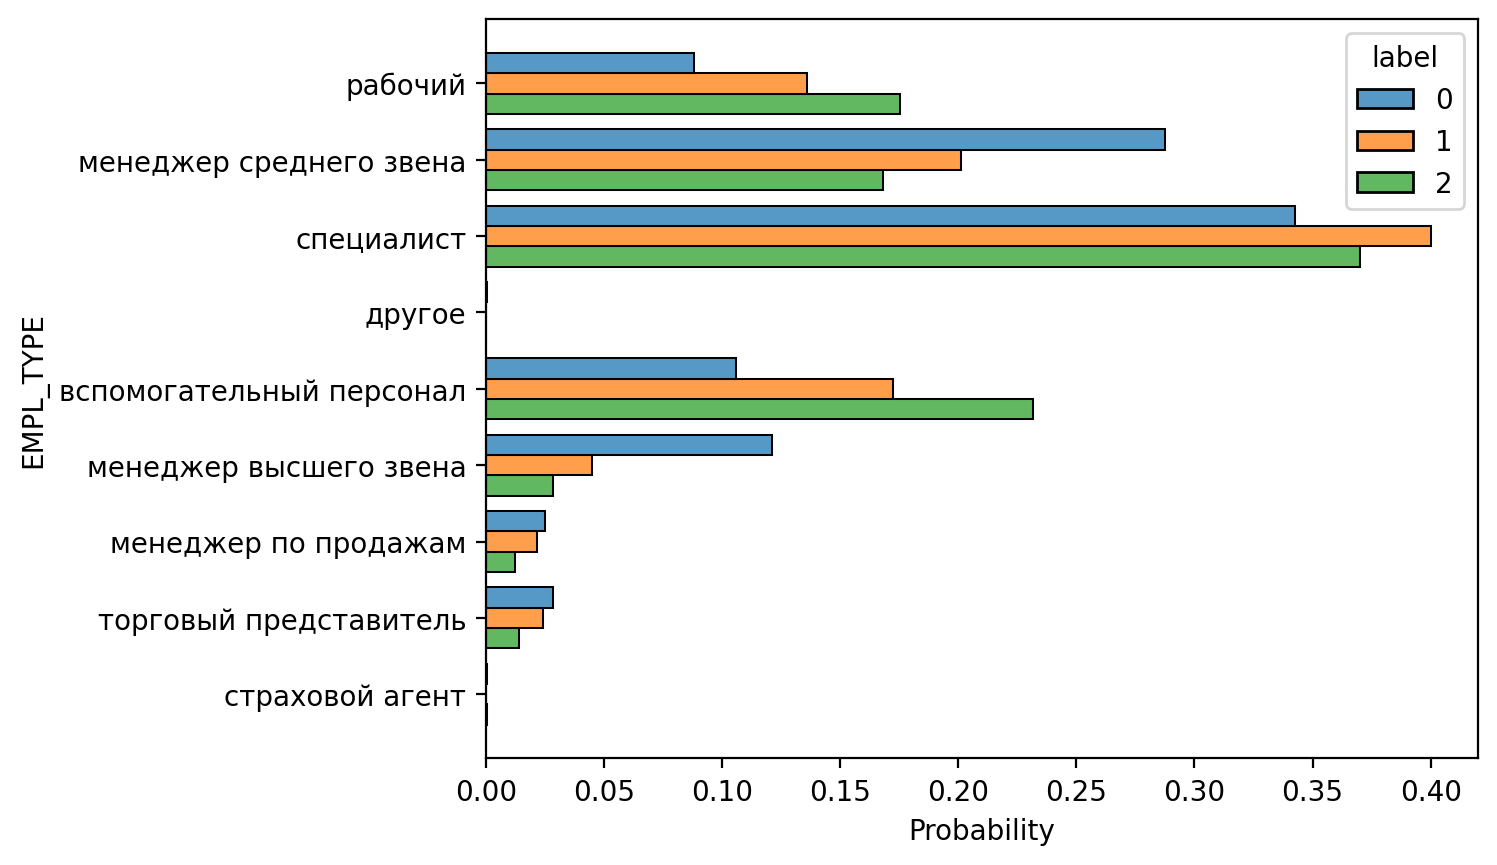

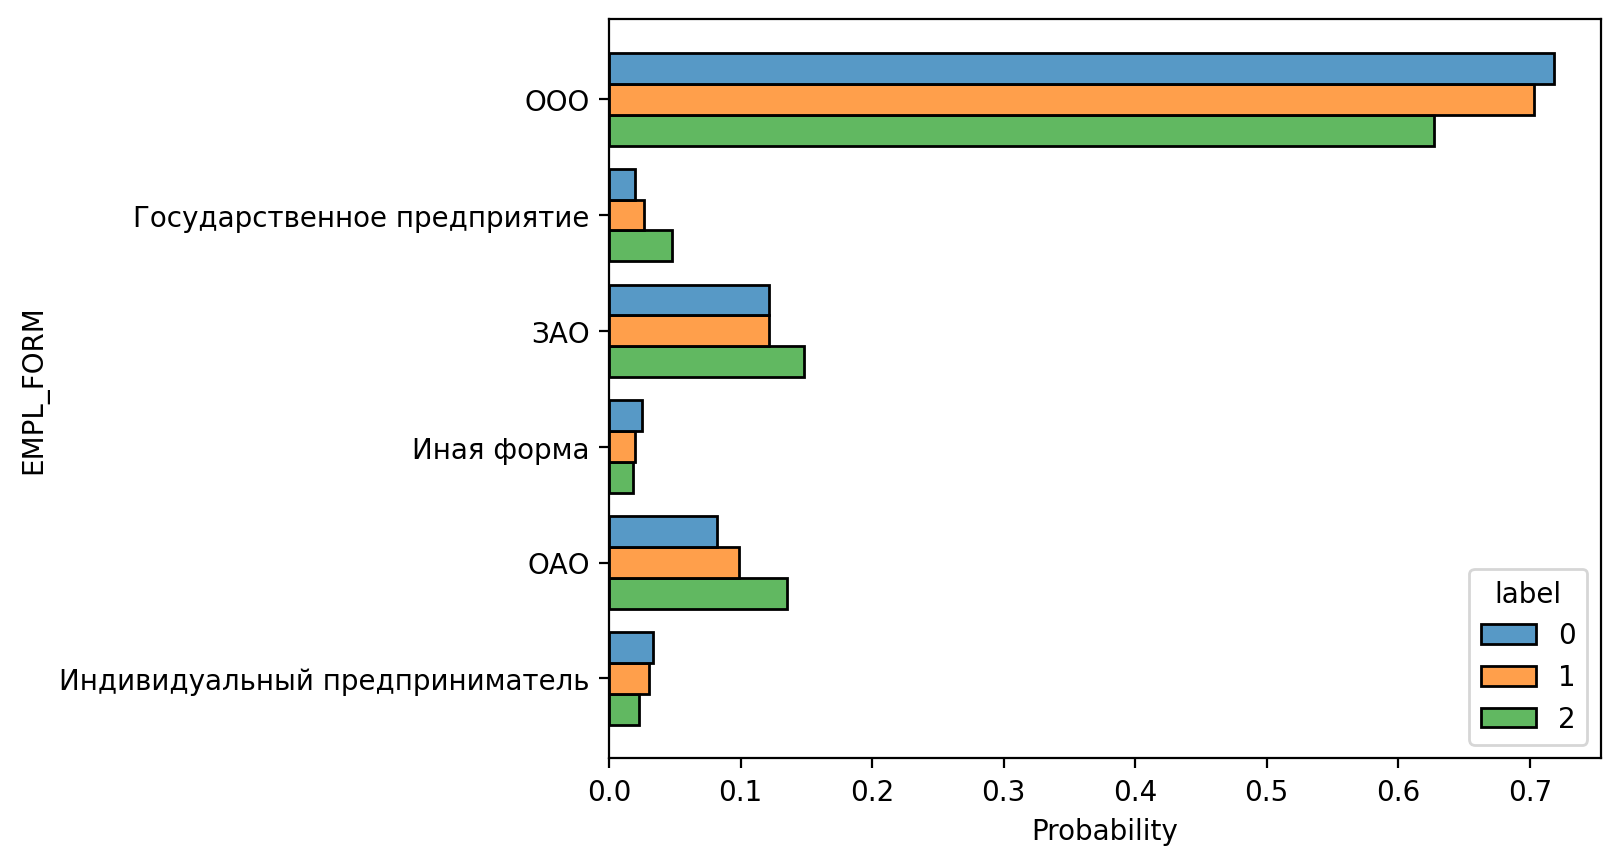

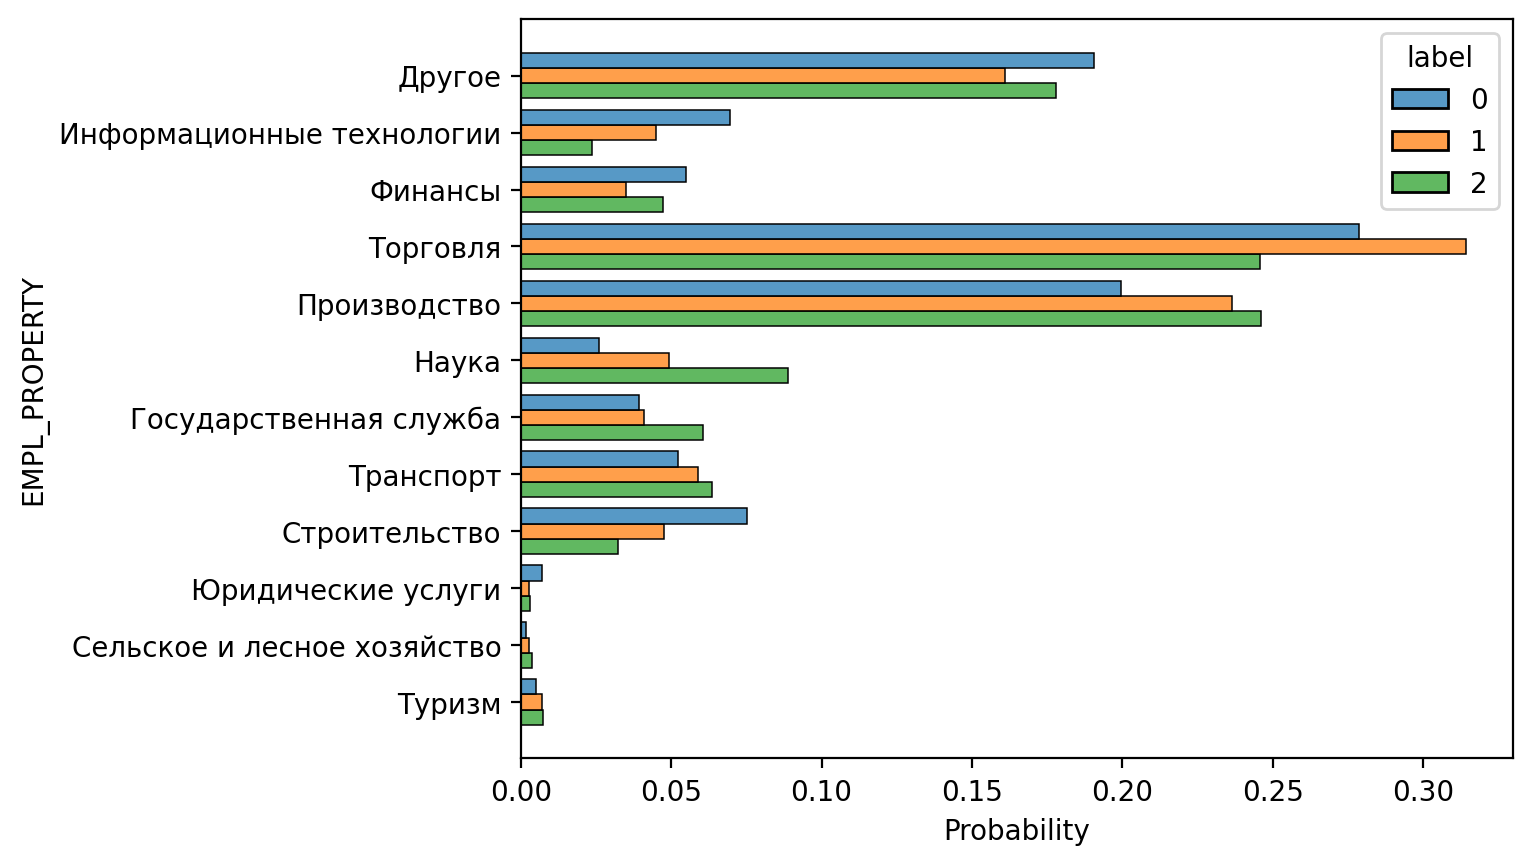

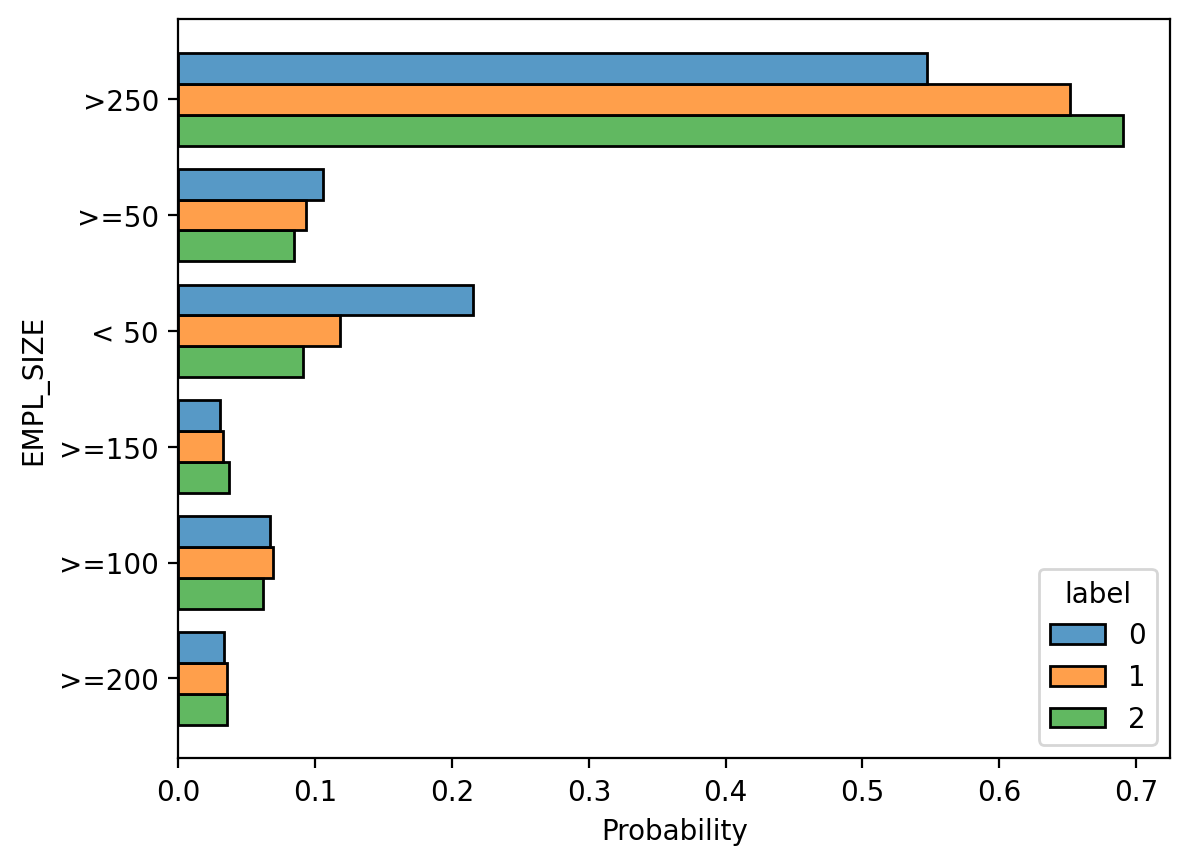

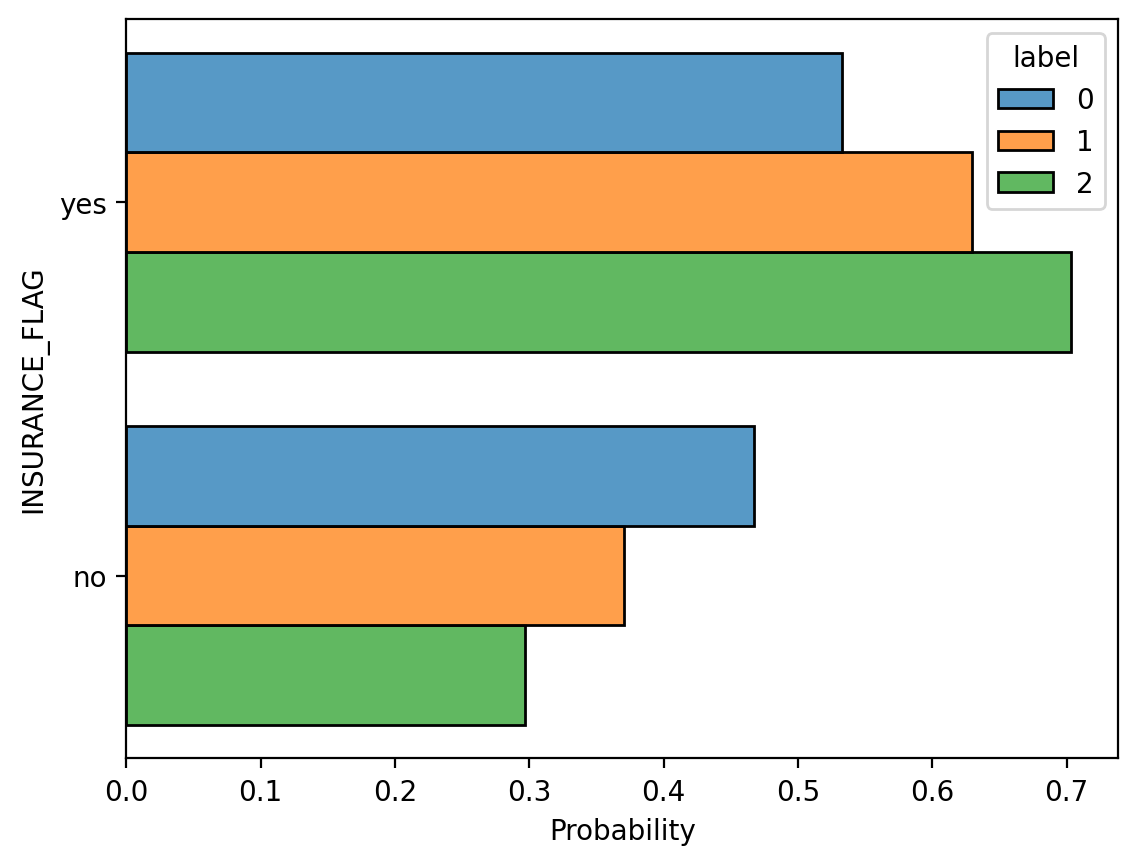

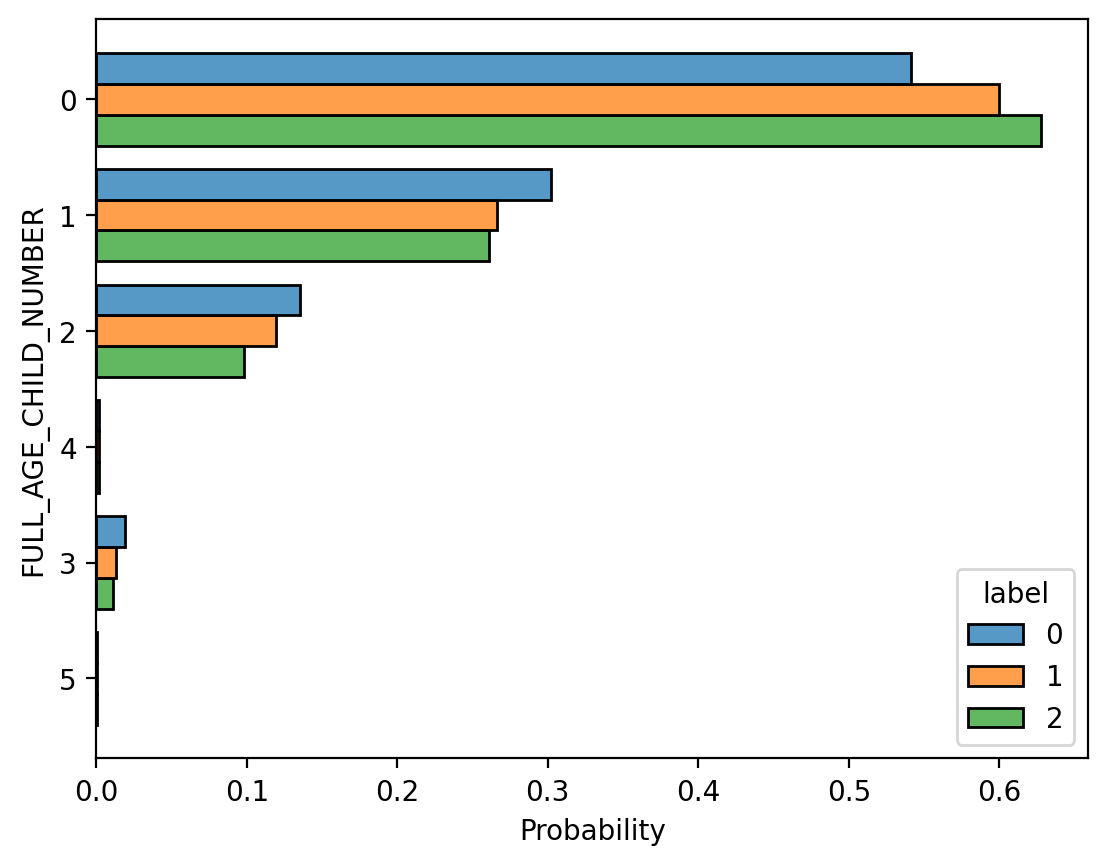

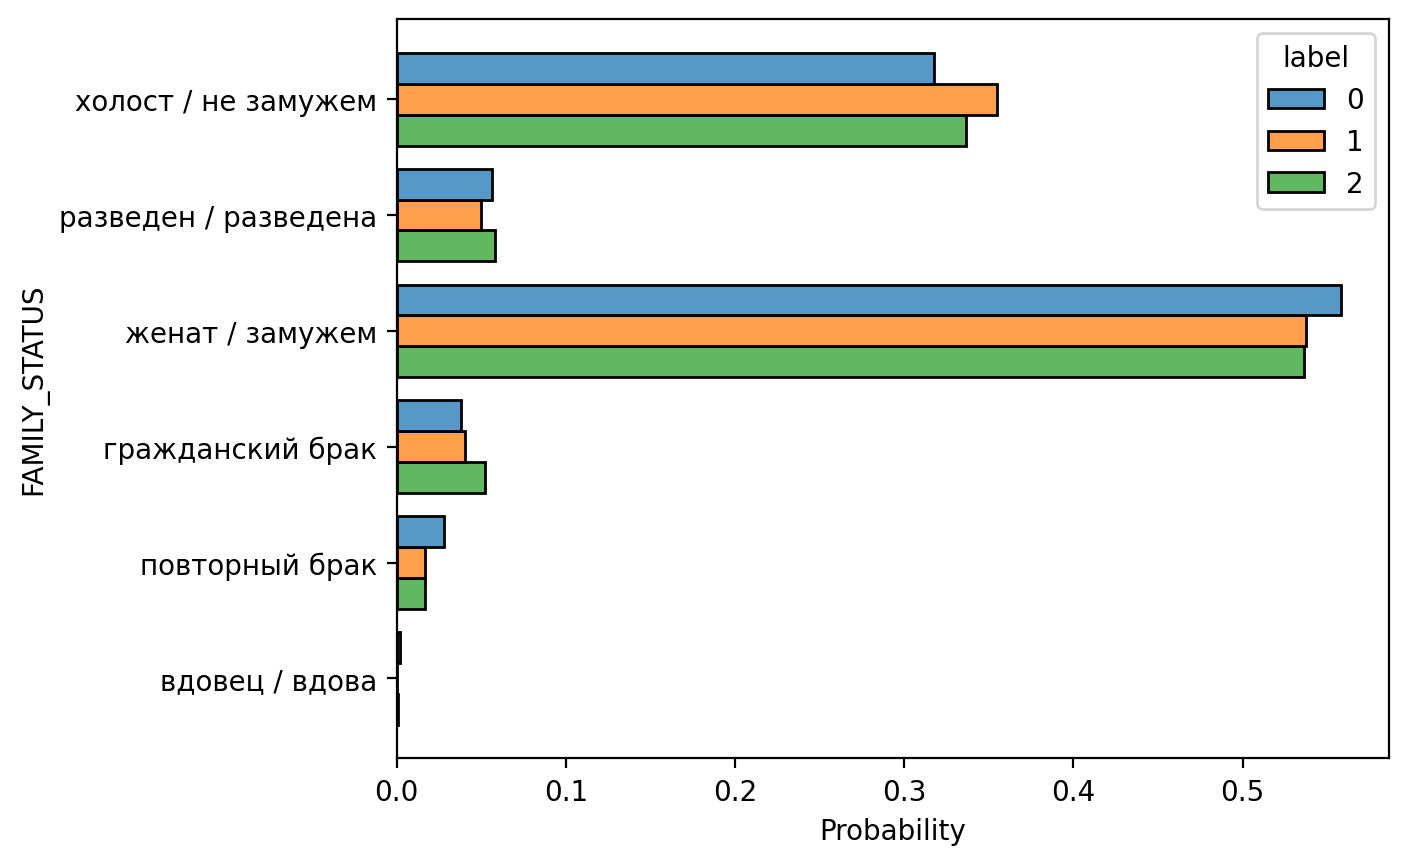

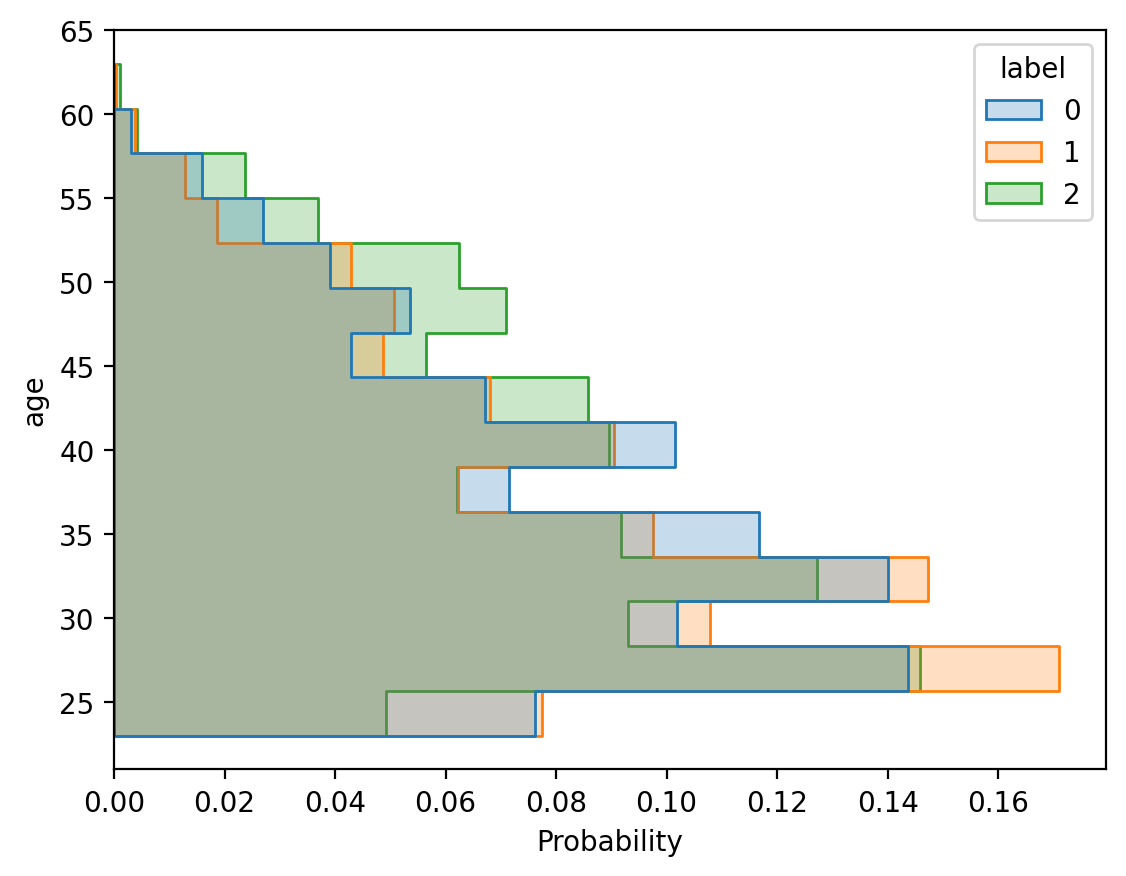

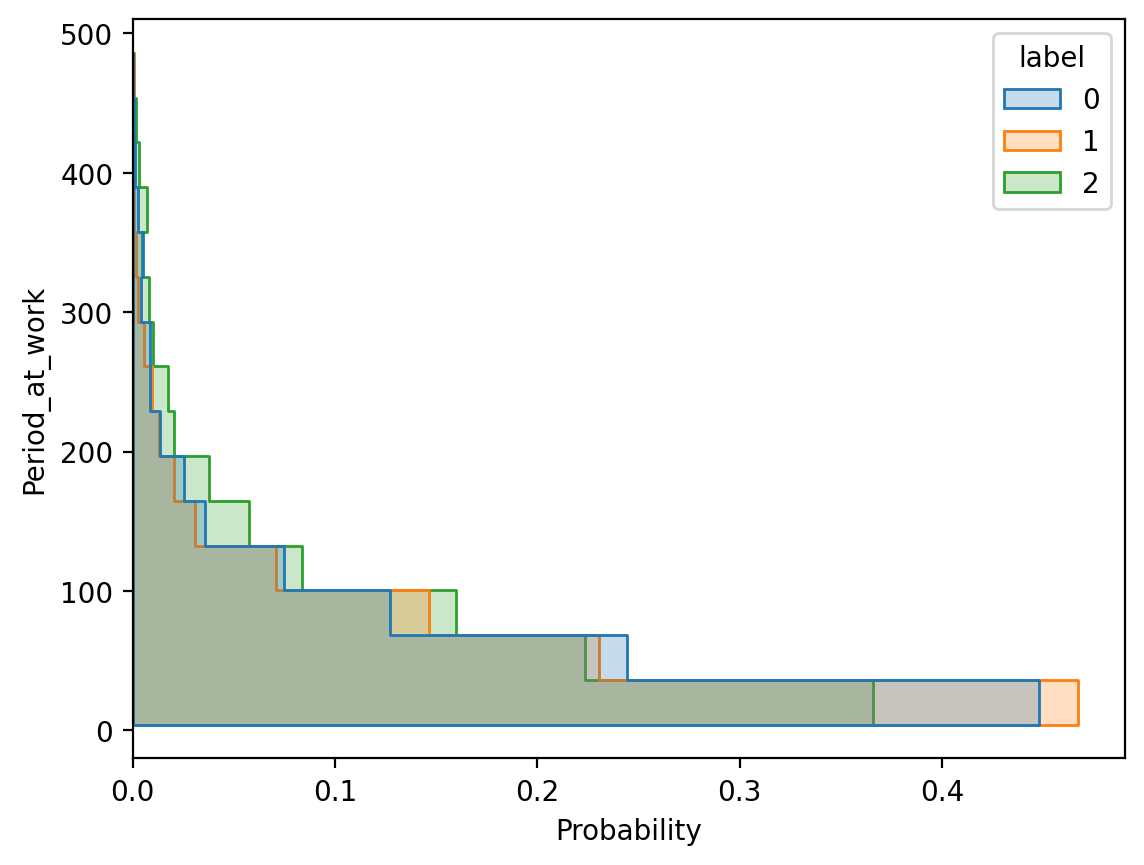

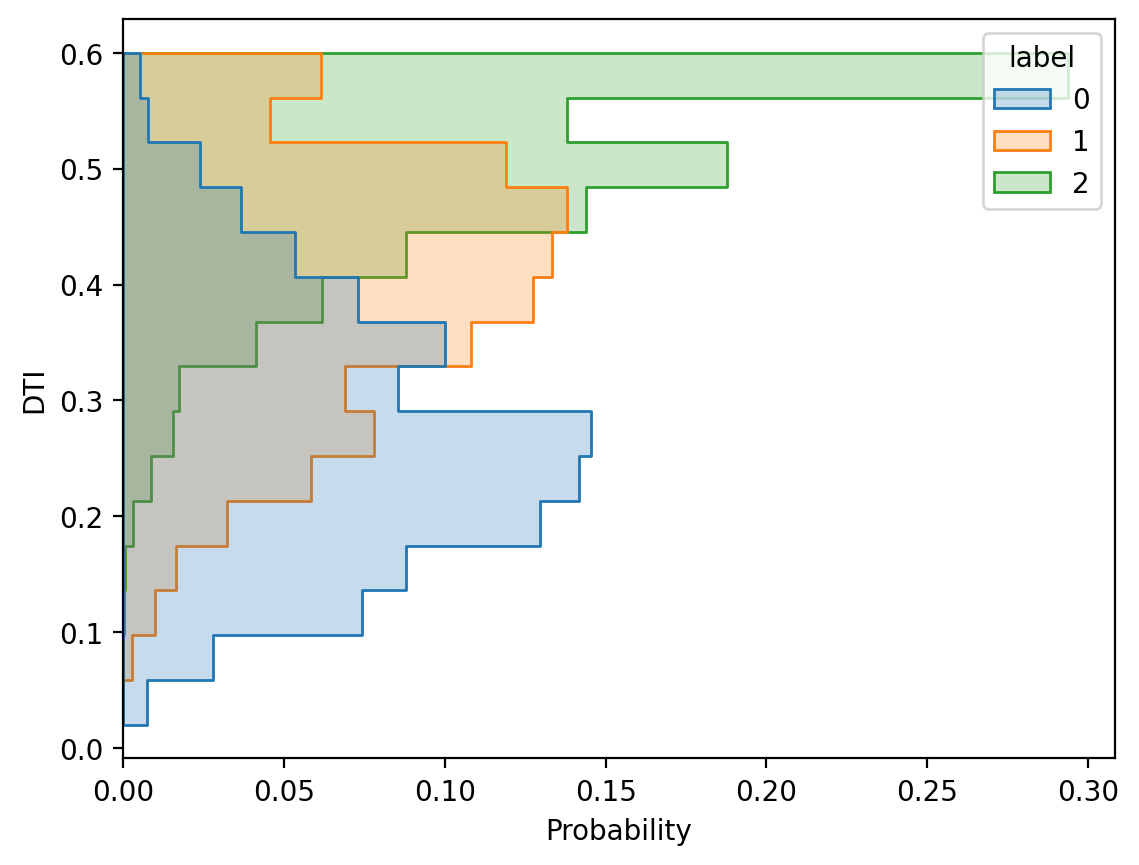

INCOME_BASE_TYPE CREDIT_PURPOSE      SEX EDUCATION  \
0  Форма банка (без печати работодателя)         Ремонт  мужской    высшее   
1           Поступление зарплаты на счет         Ремонт  мужской    высшее   
2                                  2НДФЛ         Ремонт  женский    высшее   

    EMPL_TYPE EMPL_FORM EMPL_PROPERTY EMPL_SIZE INSURANCE_FLAG  \
0  специалист       ООО      Торговля      >250            yes   
1  специалист       ООО      Торговля      >250            yes   
2  специалист       ООО  Производство      >250            yes   

  FULL_AGE_CHILD_NUMBER    FAMILY_STATUS        age  Period_at_work       DTI  
0                     0  женат / замужем  35.917252       61.859766  0.271340  
1                     0  женат / замужем  35.486654       57.243421  0.394392  
2                     0  женат / замужем  37.517714       76.592000  0.495596

In [346]:
show_categorical = [
    'INCOME_BASE_TYPE',
    'CREDIT_PURPOSE',
    'SEX',
    'EDUCATION',
    'EMPL_TYPE',
    'EMPL_FORM',
    'EMPL_PROPERTY',
    'EMPL_SIZE',
    'INSURANCE_FLAG',
#     'DEPENDANT_NUMBER',
    'FULL_AGE_CHILD_NUMBER',
    'FAMILY_STATUS',
]

show_numeric = [
    'age',
    'Period_at_work',
    'DTI',
]

tmp1 = pd.read_csv('HW1_var_4.csv', delimiter=';').iloc[:, :18]
tmp = df.copy()
tmp['FAMILY_STATUS'] = tmp1['FAMILY_STATUS']
tmp['EMPL_FORM'] = tmp1['EMPL_FORM']
tmp['EMPL_SIZE'].replace('>100', '>=100', inplace=True)
tmp['INSURANCE_FLAG'] = tmp['INSURANCE_FLAG'].astype(str).replace({'1.0': 'yes', '0.0': 'no'})
tmp['FULL_AGE_CHILD_NUMBER'] = tmp['FULL_AGE_CHILD_NUMBER'].astype(str)

means = pd.DataFrame(columns=show_categorical + show_numeric, index=list(map(str, range(cluster_count))))

for num, column in enumerate(show_categorical):
    means[column] = tmp[column].groupby(by=tmp['label']).agg(pd.Series.mode)
    plt.figure(dpi=200)
    sns.histplot(data=tmp, y=column, hue='label', stat='probability', common_norm=False, multiple="dodge", shrink=.8)
    plt.show()
    
for num, column in enumerate(show_numeric):
    means[column] = tmp[column].groupby(by=tmp['label']).agg(pd.Series.mean)
    plt.figure(dpi=200)
    sns.histplot(data=tmp, y=column, hue='label', stat='probability', common_norm=False, element="step", bins=15)
    plt.show()
    
means

In [339]:
means

INCOME_BASE_TYPE CREDIT_PURPOSE      SEX EDUCATION  \
0  Форма банка (без печати работодателя)         Ремонт  мужской    высшее   
1           Поступление зарплаты на счет         Ремонт  мужской    высшее   
2                                  2НДФЛ         Ремонт  женский    высшее   

    EMPL_TYPE EMPL_FORM EMPL_PROPERTY EMPL_SIZE INSURANCE_FLAG  \
0  специалист       ООО      Торговля      >250            yes   
1  специалист       ООО      Торговля      >250            yes   
2  специалист       ООО  Производство      >250            yes   

  FULL_AGE_CHILD_NUMBER    FAMILY_STATUS        age  Period_at_work       DTI  
0                     0  женат / замужем  35.917252       61.859766  0.271340  
1                     0  женат / замужем  35.486654       57.243421  0.394392  
2                     0  женат / замужем  37.517714       76.592000  0.495596

### 0-Работяга

Мужчина, специалист или менеджер среднего звена с низкой закредитованностью. Низкая закредитованность. Имеет высшее образование. Для подтверждения дохода использует форму банка. Мало зарабатывает.

### 1-Среднячок

Мужчина или женщина, чаще других не в браке, берет кредит на ремонт или автомобиль. Специалист на производстве или торговле. Часто меняет работу.

### 2-Хозяйка

Женщина, умеющая заказывать 2НДФЛ, с высокой закредитованностью. Чаще других берет кредит на покупку недвижимости и работает вспомогательным персоналом. Редко меняет работу.